# Merge commodities into one dataframe

This will auto-import and process price histories exported from LSEG Workspace


In [3]:
import pandas as pd
import os

def load_and_align_excel_data(folder_path: str) -> pd.DataFrame:
    """
    Loads all .xlsx files in the given folder, detects the row containing 'Exchange Date',
    reads the data starting from that row, sets 'Exchange Date' as index, and concatenates
    all files on the date index using a MultiIndex for column names.
    
    Returns a single aligned DataFrame.
    """
    combined_df = pd.DataFrame()
    files = [f for f in os.listdir(folder_path) if f.endswith(".xlsx") and os.path.isfile(os.path.join(folder_path, f))]

    for filename in files:
        filepath = os.path.join(folder_path, filename)
        try:
            # Read first 50 rows to locate header
            preview = pd.read_excel(filepath, nrows=50, header=None)
            header_row_idx = None
            for i, row in preview.iterrows():
                if any(str(cell).strip() == "Exchange Date" for cell in row):
                    header_row_idx = i
                    break
            if header_row_idx is None:
                print(f"[WARN] 'Exchange Date' header not found in {filename}. Skipping.")
                continue

            # Read commodity name from cell (0,0)
            try:
                df_commodity_name = pd.read_excel(filepath, nrows=1, header=None)
                commodity_name = str(df_commodity_name.iloc[0, 0]).strip()
                # Remove " | Price History" and anything after from the commodity name
                if " | Price History" in commodity_name:
                    commodity_name = commodity_name.split(" | Price History")[0].strip()
            except:
                commodity_name = "Unknown"

            fp_name = os.path.splitext(filename)[0]
            combined_name = f"{fp_name} ({commodity_name})"

            # Read main data starting from header row
            df_temp = pd.read_excel(filepath, skiprows=header_row_idx)

            if "Exchange Date" not in df_temp.columns:
                print(f"[ERROR] 'Exchange Date' column not found after skipping rows in {filename}. Skipping.")
                continue

            df_temp = df_temp.set_index("Exchange Date")

            # Apply MultiIndex
            df_temp.columns = pd.MultiIndex.from_product([[combined_name], df_temp.columns])

            # Align on date index
            combined_df = pd.concat([combined_df, df_temp], axis=1)

        except Exception as e:
            print(f"[ERROR] Failed to process {filename}: {e}")

    return combined_df

In [4]:
folder_path = "data/front-month"

# Load and align data from all Excel files in the folder
#
loaded_front_month_df = load_and_align_excel_data(folder_path)

In [5]:
folder_path_2 = "data/second-month"

loaded_second_month_df = load_and_align_excel_data(folder_path_2)

In [6]:

front_month_df = loaded_front_month_df.reindex(sorted(loaded_front_month_df.columns), axis=1)
front_month_df.tail(3)

ph-cocoa-1 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 1)  \
                                                                                      %Chg   
Exchange Date                                                                                
2025-05-16                                              0.062494                             
2025-05-19                                                   NaN                             
2025-05-20                                                   NaN                             

                                                                       \
                   Ask      Bid    Close     High      Low    Net  OI   
Exchange Date                                                           
2025-05-16     10946.0  10927.0  10898.0  11068.0  10308.0  641.0 NaN   
2025-05-19         NaN      NaN      NaN      NaN      NaN    NaN NaN   
2025-05-20         NaN      NaN      NaN      NaN      NaN    NaN NaN   

                                 ...  \
                  Open   Volume  ...   
Exchange Date                    ...   
2025-05-16     10375.0  13430.0  ...   
2025-05-19         NaN      NaN  ...   
2025-05-20         NaN      NaN  ...   

              ph-wheat-1 (CBoT Wheat Electronic Commodity Future Continuation 1)  \
                                                                            %Chg   
Exchange Date                                                                      
2025-05-16                                             -0.014547                   
2025-05-19                                                   NaN                   
2025-05-20                                                   NaN                   

                                                                          \
                Ask     Bid Close   High    Low     Net        OI   Open   
Exchange Date                                                              
2025-05-16     5.25  5.2475  5.25  5.335  5.235 -0.0775  265615.0  5.335   
2025-05-19      NaN     NaN   NaN    NaN    NaN     NaN       NaN    NaN   
2025-05-20      NaN     NaN   NaN    NaN    NaN     NaN       NaN    NaN   

                        
                Volume  
Exchange Date           
2025-05-16     49356.0  
2025-05-19         NaN  
2025-05-20         NaN  

[3 rows x 234 columns]

In [7]:
second_month_df = loaded_second_month_df.reindex(sorted(loaded_second_month_df.columns), axis=1)# sort columns alphabetically
second_month_df.tail(3)


ph-cocoa-2 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 2)  \
                                                                                      %Chg   
Exchange Date                                                                                
2025-05-16                                              0.057026                             
2025-05-19                                                   NaN                             
2025-05-20                                                   NaN                             

                                                                              \
                   Ask      Bid    Close     High     Low    Net  OI    Open   
Exchange Date                                                                  
2025-05-16     10437.0  10418.0  10380.0  10547.0  9845.0  560.0 NaN  9940.0   
2025-05-19         NaN      NaN      NaN      NaN     NaN    NaN NaN     NaN   
2025-05-20         NaN      NaN      NaN      NaN     NaN    NaN NaN     NaN   

                       ...  \
               Volume  ...   
Exchange Date          ...   
2025-05-16     7986.0  ...   
2025-05-19        NaN  ...   
2025-05-20        NaN  ...   

              ph-wheat-2 (CBoT Wheat Electronic Commodity Future Continuation 2)  \
                                                                            %Chg   
Exchange Date                                                                      
2025-05-16                                             -0.013724                   
2025-05-19                                                   NaN                   
2025-05-20                                                   NaN                   

                                                                          \
                  Ask   Bid Close    High     Low    Net        OI  Open   
Exchange Date                                                              
2025-05-16     5.4175  5.34  5.39  5.4725  5.3775 -0.075  106049.0  5.46   
2025-05-19        NaN   NaN   NaN     NaN     NaN    NaN       NaN   NaN   
2025-05-20        NaN   NaN   NaN     NaN     NaN    NaN       NaN   NaN   

                        
                Volume  
Exchange Date           
2025-05-16     18856.0  
2025-05-19         NaN  
2025-05-20         NaN  

[3 rows x 234 columns]

## Tang & Xiong Fig 1 extended

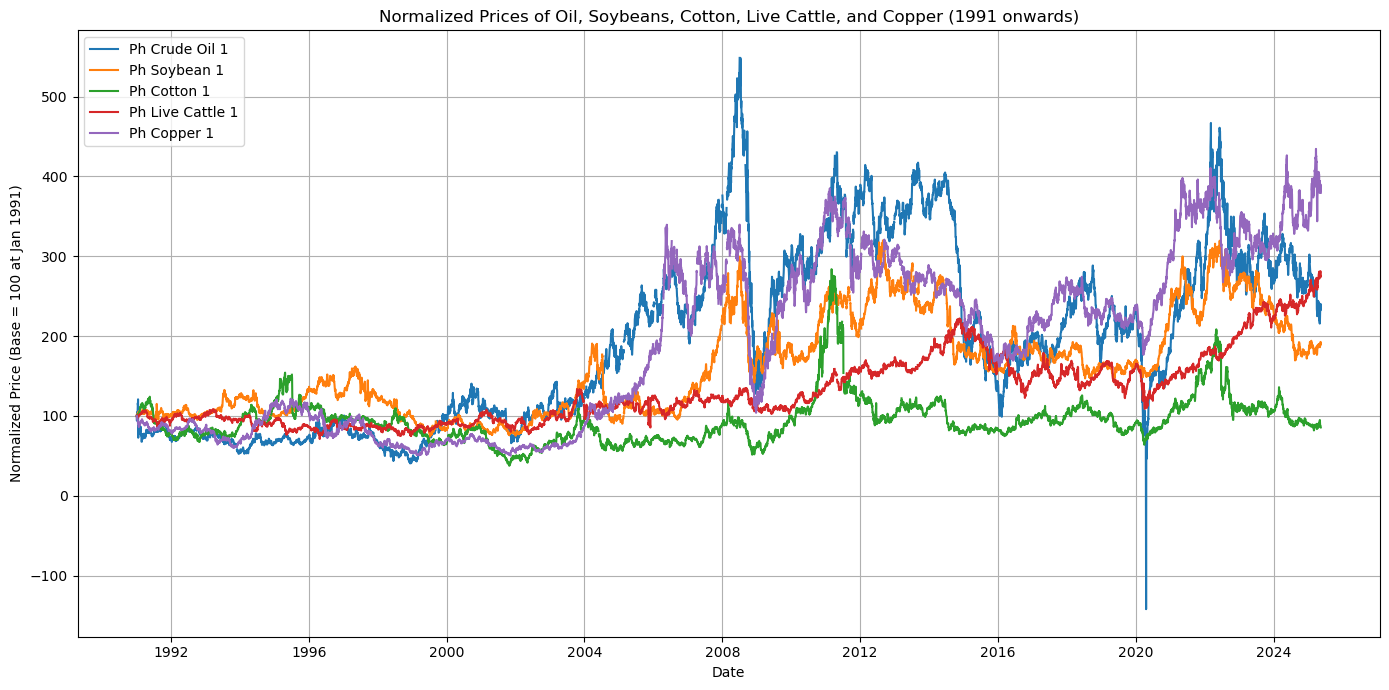

In [8]:
import matplotlib.pyplot as plt

# Cleaned commodity names to match the MultiIndex in front_month_df
commodities = [
    "ph-crude-oil-1 (NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation 1)",
    "ph-soybean-1 (CBoT Soybeans Electronic Commodity Future Continuation 1)",
    "ph-cotton-1 (ICE-US Cotton No. 2 Futures Electronic Commodity Future Continuation 1)",
    "ph-live-cattle-1 (CME Live Cattle Electronic Commodity Future Continuation 1)",
    "ph-copper-1 (COMEX Copper Electronic Commodity Future Continuation 1)"
]

all_commodities = [
# 'ph-aluminium-1 (COMEX Aluminium Electronic Commodity Future Continuation 1)'
# 'ph-cocoa-1 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 1)',
# 'ph-coffee-1 (ICE-US Coffee C Futures Electronic Commodity Future Continuation 1)',
# 'ph-copper-1 (COMEX Copper Electronic Commodity Future Continuation 1)',

# 'ph-corn-1 (CBoT Corn Composite Commodity Future)',
# 'ph-cotton-1 (ICE-US Cotton No. 2 Futures Electronic Commodity Future Continuation 1)',

'ph-crude-oil-1 (NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation 1)',
'ph-gasoline-1 (NYMEX RBOB Gasoline Electronic Energy Future Continuation 1)',
'ph-gold-1 (COMEX Gold Electronic Commodity Future Continuation 1)',
# 'ph-heating-oil-1 (NYMEX NY Harbor ULSD Electronic Energy Future Continuation 1)',
# 'ph-lean-hogs-1 (CME Lean Hogs Electronic Commodity Future Continuation 1)',
# 'ph-live-cattle-1 (CME Live Cattle Electronic Commodity Future Continuation 1)',
# 'ph-natgas-1 (NYMEX Henry Hub Natural Gas Electronic Energy Future Continuation 1)',
# 'ph-oats-1 (CBoT Oats Electronic Commodity Future Continuation 1)',
# 'ph-orange-juice-1 (ICE-US FCOJ-A Futures Electronic Commodity Future Continuation 1)',
# 'ph-palladium-1 (NYMEX Palladium Electronic Commodity Future Continuation 1)',
# 'ph-platinum-1 (NYMEX Platinum Electronic Commodity Future Continuation 1)',
# 'ph-rough-rice-1 (CBoT Rough Rice Electronic Commodity Future Continuation 1)',
# 'ph-silver-1 (COMEX Silver Composite Commodity Future)',
# 'ph-soybean-1 (CBoT Soybeans Electronic Commodity Future Continuation 1)',
# 'ph-soybean-meal-1 (CBoT Soybean Meal Electronic Commodity Future Continuation 1)',
# 'ph-soybean-oil-1 (CBoT Soybean Oil Electronic Commodity Future Continuation 1)',
# 'ph-sugar-1 (ICE-US Sugar No. 11 Futures Electronic Commodity Future Continuation 1)',
# 'ph-wheat-1 (CBoT Wheat Electronic Commodity Future Continuation 1)',
]


plt.figure(figsize=(14, 7))

# for commodity in front_month_df.columns.levels[0]:
for commodity in commodities:
    # print(f"Processing commodity: {commodity}")
    
    # Check if the column exists in the DataFrame
    if (commodity, "Close") in front_month_df.columns:
        # print(f"Column found for {commodity}")
        
        # Extract the series
        series = front_month_df[(commodity, "Close")].loc["1991":]
        # print(f"Extracted series for {commodity}:\n{series.head()}")
        
        # Find the first non-NaN value in January 1991
        # monthly_series = series.resample('M').last()
        # jan_1991_value = monthly_series.loc["1991-01"].dropna().iloc[0] if not monthly_series.loc["1991-01"].dropna().empty else None
 
        jan_1991_series = series.loc["1991-01"]
        jan_1991_value = jan_1991_series.dropna().iloc[0] if not jan_1991_series.dropna().empty else None
        
        if jan_1991_value:
            # print(f"First non-NaN value in January 1991 for {commodity}: {jan_1991_value}")
            
            # Normalize the series
            normalized_series = (series / jan_1991_value) * 100
            plt.plot(normalized_series.index, normalized_series, label=commodity.split('(')[0].replace('-', ' ').strip().title())
        else:
            print(f"No valid data in January 1991 for {commodity}")
    else:
        print(f"Column not found for {commodity}")

plt.title("Normalized Prices of Oil, Soybeans, Cotton, Live Cattle, and Copper (1991 onwards)")
plt.xlabel("Date")
plt.ylabel("Normalized Price (Base = 100 at Jan 1991)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [410]:
def return_monthly_closes(commodity, df):
    closes = df[commodity]['Close'].copy()
    monthly = closes.resample('ME').last()
    return monthly

front_monthly_closes_df = pd.DataFrame()
for commodity in front_month_df.columns.levels[0]:
    front_monthly_closes_df[commodity] = return_monthly_closes(commodity, front_month_df)

second_monthly_closes_df = pd.DataFrame()
for commodity in second_month_df.columns.levels[0]:
    second_monthly_closes_df[commodity] = return_monthly_closes(commodity, second_month_df)


def return_closes(commodity, df):
    closes = df[commodity]['Close'].copy()
    return closes   

front_closes_df = pd.DataFrame()
for commodity in front_month_df.columns.levels[0]:
    front_closes_df[commodity] = return_closes(commodity, front_month_df)

second_closes_df = pd.DataFrame()
for commodity in second_month_df.columns.levels[0]:
    second_closes_df[commodity] = return_closes(commodity, second_month_df)
    


In [372]:
# for each commodity in both dataframes find the first and last non-nan year and month and print in one line, sorted by start date

print("_________START FOR FRONT MONTH DATA__________")
front_ranges = []
for commodity in front_monthly_closes_df.columns:
    first_valid = front_monthly_closes_df[commodity].first_valid_index()
    last_valid = front_monthly_closes_df[commodity].last_valid_index()
    front_ranges.append((first_valid, last_valid, commodity))

# Sort by start date (None values last)
front_ranges_sorted = sorted(front_ranges, key=lambda x: (x[0] is None, x[0]))

for start, end, commodity in front_ranges_sorted:
    start_str = start.strftime('%Y-%m') if start else "None"
    end_str = end.strftime('%Y-%m') if end else "None"
    commodity_cut_str = commodity.split('(')[0].strip()
    print(f"{commodity_cut_str}: start={start_str}, end={end_str}")

print("_________START FOR SECOND MONTH DATA__________")
second_ranges = []
for commodity in second_monthly_closes_df.columns:
    first_valid = second_monthly_closes_df[commodity].first_valid_index()
    last_valid = second_monthly_closes_df[commodity].last_valid_index()
    second_ranges.append((first_valid, last_valid, commodity))

# Sort by start date (None values last)
second_ranges_sorted = sorted(second_ranges, key=lambda x: (x[0] is None, x[0]))

for start, end, commodity in second_ranges_sorted:
    start_str = start.strftime('%Y-%m') if start else "None"
    end_str = end.strftime('%Y-%m') if end else "None"
    commodity_cut_str = commodity.split('(')[0].strip()
    print(f"{commodity_cut_str}: start={start_str}, end={end_str}")

_________START FOR FRONT MONTH DATA__________
ph-cocoa-1: start=1973-01, end=2025-05
ph-corn-1: start=1973-01, end=2025-05
ph-lean-hogs-1: start=1973-01, end=2025-05
ph-oats-1: start=1973-01, end=2025-05
ph-orange-juice-1: start=1973-01, end=2025-05
ph-platinum-1: start=1973-01, end=2025-05
ph-silver-1: start=1973-01, end=2025-05
ph-soybean-1: start=1973-01, end=2025-05
ph-soybean-meal-1: start=1973-01, end=2025-05
ph-soybean-oil-1: start=1973-01, end=2025-05
ph-sugar-1: start=1973-01, end=2025-05
ph-wheat-1: start=1973-01, end=2025-05
ph-gold-1: start=1978-01, end=2025-05
ph-heating-oil-1: start=1978-11, end=2025-05
ph-coffee-1: start=1979-11, end=2025-05
ph-cotton-1: start=1980-01, end=2025-05
ph-live-cattle-1: start=1980-01, end=2025-05
ph-palladium-1: start=1980-01, end=2025-05
ph-rough-rice-1: start=1981-04, end=2025-05
ph-crude-oil-1: start=1983-03, end=2025-05
ph-copper-1: start=1988-07, end=2025-05
ph-natgas-1: start=1990-04, end=2025-05
ph-gasoline-1: start=2005-10, end=2025-0

# Constructing the Index

First we select our test period. Let's do it for 2004-2014

In [472]:
start_date = pd.to_datetime("1991-01-01") - pd.DateOffset(months=1)
end_date = pd.to_datetime("2025-01-01")

### Load & process T-bill Data (monthly returns)
TODO: EXPLAIN WHY USING 3-month and how we're compensating for using that


Date range: from 1969-01-01 to 2025-04-01

Unit of values: % interest rate for 3-Month Treasury Bill Secondary Market Rate, Discount Basis ([link](https://fred.stlouisfed.org/series/TB3MS))

In [473]:
t_bill_3m_df = pd.read_csv("data/t-bills/3-month-t-bill-secondary-market-rate-discount-basis.csv")

cut data range for now, for simplicity

In [474]:
# Filter t_bill_3m_df for dates from 2003-12-01 to 2015-01-31
t_bill_3m_df['observation_date'] = pd.to_datetime(t_bill_3m_df['observation_date'])
t_bill_3m_df = t_bill_3m_df[
    (t_bill_3m_df['observation_date'] >= start_date) &
    (t_bill_3m_df['observation_date'] <= end_date)
]
# t_bill_3m_df.head(3)

Convert to 1 month equivalent

- TODO: understand why I'm using bey

In [475]:
def convert_to_1mo_rate(tbill_3mo):
    """Convert 3-month discount rate to 1-month equivalent"""
    # Step 1: Convert discount rate to price
    price_3mo = 100 * (1 - tbill_3mo/100 * 90/360)
    
    # Step 2: Calculate bond-equivalent yield (as a decimal)
    bey = (100 - price_3mo) / price_3mo * 365/90
    
    # Step 3: Convert to 1-month return (Corrected: removed '/100')
    return (1 + bey)**(30/365) - 1

tbill_df = t_bill_3m_df.copy()
# Apply conversion
tbill_df['monthly_return'] = tbill_df['TB3MS'].apply(convert_to_1mo_rate)
# tbill_data = tbill_data.drop(columns=['TB3MS'])
# print(tbill_df.columns)

Ensure that the new index only contains year and month - since there's only 1 tbill value per month

In [476]:
tbill_df['Month'] = tbill_df['observation_date'].dt.to_period('M')  # add a period column
tbill_df = tbill_df.set_index('Month')  # set period as index
tbill_df.drop(columns=['observation_date'], inplace=True)  # drop the original date column, since now the index is the period
tbill_df.head()

,TB3MS,monthly_return
Month,,
1990-12,6.74,0.005538
1991-01,6.22,0.005116
1991-02,5.94,0.004889
1991-03,5.91,0.004865
1991-04,5.65,0.004653


### Extract Monthly Closes

##### Spot Index Construction

## Process each commodity

*"For Pork Bellies during the months of 08/62, 09/62, 08/63 and 09/63 there were gaps during which no prices for any contracts were available. For Feeder Cattle on 3/73 and Rough Rice on 11/87 we were unable to roll into the next futures contract due to missing data. Finally, for Milk and 07/97 and Butter and 10/98 no single futures contract was available for the duration of the entire month. For these eight months we set price (excess) return to zero – in terms of mechanical trading strategy the index invested the money allocated to these commodities in 30 day Treasury Bills for these months"* - page 33 og paper

### .....


Later, if a particular month's close is NaN (missing), then when 

In [477]:
def determine_inclusion_month(monthly):
    
    """Determine the inclusion month for futures data based on the first valid date."""
    first_valid_date = monthly.first_valid_index()
    if pd.isnull(first_valid_date):
        return None  # Skip if no data
    
    # Inclusion month is the next month after the first valid date
    inclusion_month = first_valid_date + pd.offsets.MonthEnd(1)
    return inclusion_month

def determine_exclusion_month(monthly):
    """Determine the exclusion month for futures data based on the last valid date."""
    last_valid_date = monthly.last_valid_index()
    if pd.isnull(last_valid_date):
        return None
    # Exclusion month is the month of the last valid date
    exclusion_month = last_valid_date + pd.offsets.MonthEnd(0)
    return exclusion_month

### Prep monthly close prices

In [478]:
# filter for selected dates
filtered_front_month_df = front_month_df.loc[start_date:end_date]
filtered_second_month_df = second_month_df.loc[start_date:end_date]

In [479]:
filtered_front_month_df.head(5)

ph-cocoa-1 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 1)  \
                                                                                      %Chg   
Exchange Date                                                                                
1990-12-03                                             -0.022490                             
1990-12-04                                             -0.016434                             
1990-12-05                                              0.000000                             
1990-12-06                                              0.022556                             
1990-12-07                                             -0.029412                             

                                                                           \
              Ask Bid   Close    High     Low   Net     OI    Open Volume   
Exchange Date                                                               
1990-12-03    NaN NaN  1217.0  1247.0  1214.0 -28.0  399.0  1245.0   83.0   
1990-12-04    NaN NaN  1197.0  1226.0  1188.0 -20.0  349.0  1216.0   55.0   
1990-12-05    NaN NaN  1197.0  1200.0  1188.0   0.0  307.0  1200.0   41.0   
1990-12-06    NaN NaN  1224.0  1228.0  1196.0  27.0  281.0  1196.0   30.0   
1990-12-07    NaN NaN  1188.0  1210.0  1188.0 -36.0  269.0  1210.0   13.0   

               ...  \
               ...   
Exchange Date  ...   
1990-12-03     ...   
1990-12-04     ...   
1990-12-05     ...   
1990-12-06     ...   
1990-12-07     ...   

              ph-wheat-1 (CBoT Wheat Electronic Commodity Future Continuation 1)  \
                                                                            %Chg   
Exchange Date                                                                      
1990-12-03                                              0.010204                   
1990-12-04                                             -0.011111                   
1990-12-05                                             -0.005107                   
1990-12-06                                              0.014374                   
1990-12-07                                              0.024291                   

                                                                               
              Ask Bid   Close    High     Low     Net      OI    Open  Volume  
Exchange Date                                                                  
1990-12-03    NaN NaN  2.4750  2.4750  2.4450  0.0250  3018.0  2.4500  1148.0  
1990-12-04    NaN NaN  2.4475  2.4725  2.4325 -0.0275  2706.0  2.4650  1294.0  
1990-12-05    NaN NaN  2.4350  2.4550  2.4275 -0.0125  1941.0  2.4300  1980.0  
1990-12-06    NaN NaN  2.4700  2.4775  2.4225  0.0350  1461.0  2.4225  1181.0  
1990-12-07    NaN NaN  2.5300  2.5300  2.4650  0.0600  1029.0  2.4650   746.0  

[5 rows x 234 columns]

In [480]:
filtered_second_month_df.head()

ph-cocoa-2 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 2)  \
                                                                                      %Chg   
Exchange Date                                                                                
1990-12-03                                             -0.022603                             
1990-12-04                                             -0.014354                             
1990-12-05                                              0.000000                             
1990-12-06                                              0.021845                             
1990-12-07                                             -0.028504                             

                                                                              \
              Ask Bid   Close    High     Low   Net       OI    Open  Volume   
Exchange Date                                                                  
1990-12-03    NaN NaN  1254.0  1291.0  1250.0 -29.0  18327.0  1285.0  3279.0   
1990-12-04    NaN NaN  1236.0  1265.0  1225.0 -18.0  18544.0  1261.0  5409.0   
1990-12-05    NaN NaN  1236.0  1246.0  1220.0   0.0  18021.0  1238.0  3531.0   
1990-12-06    NaN NaN  1263.0  1270.0  1237.0  27.0  16930.0  1238.0  3061.0   
1990-12-07    NaN NaN  1227.0  1257.0  1224.0 -36.0  16028.0  1256.0  3472.0   

               ...  \
               ...   
Exchange Date  ...   
1990-12-03     ...   
1990-12-04     ...   
1990-12-05     ...   
1990-12-06     ...   
1990-12-07     ...   

              ph-wheat-2 (CBoT Wheat Electronic Commodity Future Continuation 2)  \
                                                                            %Chg   
Exchange Date                                                                      
1990-12-03                                              0.008596                   
1990-12-04                                             -0.009470                   
1990-12-05                                             -0.006692                   
1990-12-06                                              0.010587                   
1990-12-07                                              0.014286                   

                                                                         \
              Ask Bid   Close    High     Low     Net       OI     Open   
Exchange Date                                                             
1990-12-03    NaN NaN  2.6400  2.6400  2.6125  0.0225  25580.0  2.61750   
1990-12-04    NaN NaN  2.6150  2.6425  2.5950 -0.0250  25400.0  2.64125   
1990-12-05    NaN NaN  2.5975  2.6225  2.5900 -0.0175  24740.0  2.60375   
1990-12-06    NaN NaN  2.6250  2.6350  2.5900  0.0275  24880.0  2.59250   
1990-12-07    NaN NaN  2.6625  2.6650  2.6100  0.0375  24600.0  2.61250   

                       
               Volume  
Exchange Date          
1990-12-03     4354.0  
1990-12-04     5906.0  
1990-12-05     5578.0  
1990-12-06     5566.0  
1990-12-07     7006.0  

[5 rows x 234 columns]

Check that our commodities match in both front month and second month

In [481]:
# get list of all commodities
commodities_front_month = filtered_front_month_df.columns.get_level_values(0).unique()
commodities_second_month = filtered_second_month_df.columns.get_level_values(0).unique()

# Cut off the last 3 characters for comparison
commodities_front_month_cut = [c[c.find("("): -3] for c in commodities_front_month]
commodities_second_month_cut = [c[c.find("("): -3] for c in commodities_second_month]

# Build mapping from cut name to full name
front_cut_to_full = {cut: full for cut, full in zip(commodities_front_month_cut, commodities_front_month)}
second_cut_to_full = {cut: full for cut, full in zip(commodities_second_month_cut, commodities_second_month)}


print("List of all spot commodities:")
for idx, commodity in enumerate(sorted(set(commodities_front_month))):
    # print(f"{idx}: {commodity}")
    print(f"'{commodity}',")

set_front = set(commodities_front_month_cut)
set_second = set(commodities_second_month_cut)
commodities = set_front | set_second

diff_front_not_second = set_front - set_second
diff_second_not_front = set_second - set_front


if diff_front_not_second:
    print("Commodities in front month but not in second month (full names):")
    for cut in sorted(diff_front_not_second):
        print(f"  {front_cut_to_full[cut]}")
if diff_second_not_front:
    print("Commodities in second month but not in front month (full names):")
    for cut in sorted(diff_second_not_front):
        print(f"  {second_cut_to_full[cut]}")
if not diff_front_not_second and not diff_second_not_front:
    print("No differences: all commodities match between front and second month.")

List of all spot commodities:
'ph-cocoa-1 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 1)',
'ph-coffee-1 (ICE-US Coffee C Futures Electronic Commodity Future Continuation 1)',
'ph-copper-1 (COMEX Copper Electronic Commodity Future Continuation 1)',
'ph-corn-1 (CBoT Corn Composite Commodity Future)',
'ph-cotton-1 (ICE-US Cotton No. 2 Futures Electronic Commodity Future Continuation 1)',
'ph-crude-oil-1 (NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation 1)',
'ph-gasoline-1 (NYMEX RBOB Gasoline Electronic Energy Future Continuation 1)',
'ph-gold-1 (COMEX Gold Electronic Commodity Future Continuation 1)',
'ph-heating-oil-1 (NYMEX NY Harbor ULSD Electronic Energy Future Continuation 1)',
'ph-lean-hogs-1 (CME Lean Hogs Electronic Commodity Future Continuation 1)',
'ph-live-cattle-1 (CME Live Cattle Electronic Commodity Future Continuation 1)',
'ph-natgas-1 (NYMEX Henry Hub Natural Gas Electronic Energy Future Continuation 1)',
'ph-oats-1 (CBoT Oats Ele

### Convert to monthly
If the data for a commodity is missing at the end of a month, to get the monthly close, we go back day by day until we find the date. So for example we take September 30, if the last day has no data for it we check 29th, 28th.... all the way to back to the 7th until we find an existing close price. If there's nothing there all the way until the 7th, then we just leave the month as NaN. TODO: insert explanation of why I chose the 7th or maybe just make it go all the way until the 1st?

In [482]:
import numpy as np

def return_monthly(commodity_name, df):
    """Process individual commodity futures data with fallback for missing end-of-month data.
    Goes backward until the 7th of the month to find a valid price if the end-of-month price is missing.
    TODO: add this to assumptions list in the report
    """
    
    # Extract close prices for this commodity
    closes = df[commodity_name]['Close'].copy()
    
    # Resample to end-of-month prices
    monthly = closes.resample('ME').last()
    
    # Adjust for missing end-of-month data
    adjusted_monthly = monthly.copy()
    for date in monthly.index:
        if pd.isna(monthly[date]):
            # Iterate backward to find the nearest valid date
            valid_date_found = False
            for offset in range(1, 25):  # Check up to 24 days backward
                fallback_date = date - pd.Timedelta(days=offset)
                if fallback_date.month != date.month or fallback_date.day < 7:
                    break  # Stop if we go beyond the 7th of the month or into the previous month
                if fallback_date in closes.index and not pd.isna(closes[fallback_date]):
                    adjusted_monthly[date] = closes[fallback_date]
                    valid_date_found = True
                    break
            if not valid_date_found:
                adjusted_monthly[date] = None  # Leave as NaN if no valid data found
    
    # Only start gap detection after the first valid value
    first_valid_idx = adjusted_monthly.first_valid_index()
    if first_valid_idx is None:
        return adjusted_monthly  # all NaN, nothing to do

    isna = adjusted_monthly.isna()
    gap = 0
    started = False
    for idx in range(len(adjusted_monthly)):
        date = adjusted_monthly.index[idx]
        if not started:
            if date == first_valid_idx:
                started = True
            else:
                continue  # skip leading NaNs
        missing = isna.iloc[idx]
        if missing:
            gap += 1
        else:
            if gap > 0:
                if gap > 2:
                    print(f"ERROR: Gap of {gap} consecutive missing monthly closes for {commodity_name} ending at {adjusted_monthly.index[idx]} - ADDRESS THIS OR JUST REMOVE THIS CHECK")
                # Interpolate for gaps of 1 or 2
                start = idx - gap
                end = idx
                adjusted_monthly.iloc[start:end] = adjusted_monthly.iloc[start-1:end+1].interpolate(limit=gap, limit_direction='both').iloc[1:gap+1].values
            gap = 0
    # Handle gap at end
    if gap > 0:
        if gap > 0:
            raise ValueError(f"Gap of {gap} consecutive missing monthly closes for {commodity_name} at end of series")
        start = len(adjusted_monthly) - gap
        adjusted_monthly.iloc[start:] = adjusted_monthly.iloc[start-1:].interpolate(limit=gap, limit_direction='both').iloc[1:].values

    return adjusted_monthly

In [483]:
spot_monthly_closes = pd.DataFrame()
for commodity_name in filtered_front_month_df.columns.get_level_values(0).unique():
    spot_monthly_closes[commodity_name] = return_monthly(commodity_name, filtered_front_month_df)

second_monthly_closes = pd.DataFrame()
for commodity_name in filtered_second_month_df.columns.get_level_values(0).unique():
    second_monthly_closes[commodity_name] = return_monthly(commodity_name, filtered_second_month_df)

In [484]:
print("Average value of each column in spot_monthly_closes:")
print(spot_monthly_closes.mean())

print("\nAverage value of each column in second_monthly_closes:")
print(second_monthly_closes.mean())

Average value of each column in spot_monthly_closes:
ph-cocoa-1 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 1)                  2171.376528
ph-coffee-1 (ICE-US Coffee C Futures Electronic Commodity Future Continuation 1)                 1.292108
ph-copper-1 (COMEX Copper Electronic Commodity Future Continuation 1)                            2.254257
ph-corn-1 (CBoT Corn Composite Commodity Future)                                                 3.672243
ph-cotton-1 (ICE-US Cotton No. 2 Futures Electronic Commodity Future Continuation 1)             0.714313
ph-crude-oil-1 (NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation 1)      51.966846
ph-gasoline-1 (NYMEX RBOB Gasoline Electronic Energy Future Continuation 1)                      2.161881
ph-gold-1 (COMEX Gold Electronic Commodity Future Continuation 1)                              927.614792
ph-heating-oil-1 (NYMEX NY Harbor ULSD Electronic Energy Future Continuation 1)                  1.

In [485]:
spot_monthly_closes.head()

,ph-cocoa-1 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 1),ph-coffee-1 (ICE-US Coffee C Futures Electronic Commodity Future Continuation 1),ph-copper-1 (COMEX Copper Electronic Commodity Future Continuation 1),ph-corn-1 (CBoT Corn Composite Commodity Future),ph-cotton-1 (ICE-US Cotton No. 2 Futures Electronic Commodity Future Continuation 1),ph-crude-oil-1 (NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation 1),ph-gasoline-1 (NYMEX RBOB Gasoline Electronic Energy Future Continuation 1),ph-gold-1 (COMEX Gold Electronic Commodity Future Continuation 1),ph-heating-oil-1 (NYMEX NY Harbor ULSD Electronic Energy Future Continuation 1),ph-lean-hogs-1 (CME Lean Hogs Electronic Commodity Future Continuation 1),...,ph-orange-juice-1 (ICE-US FCOJ-A Futures Electronic Commodity Future Continuation 1),ph-palladium-1 (NYMEX Palladium Electronic Commodity Future Continuation 1),ph-platinum-1 (NYMEX Platinum Electronic Commodity Future Continuation 1),ph-rough-rice-1 (CBoT Rough Rice Electronic Commodity Future Continuation 1),ph-silver-1 (COMEX Silver Composite Commodity Future),ph-soybean-1 (CBoT Soybeans Electronic Commodity Future Continuation 1),ph-soybean-meal-1 (CBoT Soybean Meal Electronic Commodity Future Continuation 1),ph-soybean-oil-1 (CBoT Soybean Oil Electronic Commodity Future Continuation 1),ph-sugar-1 (ICE-US Sugar No. 11 Futures Electronic Commodity Future Continuation 1),ph-wheat-1 (CBoT Wheat Electronic Commodity Future Continuation 1)
Exchange Date,,,,,,,,,,,,,,,,,,,,,
1990-12-31,1150.0,0.8865,1.183,2.3175,0.7780,28.44,NaN,394.2,0.8131,0.4887,...,1.1350,81.25,408.7,7.070,4.192,559.75,164.5,20.74,0.0937,2.6050
1991-01-31,1128.0,0.8300,1.073,2.4425,0.7909,21.54,NaN,365.8,0.7125,0.5240,...,1.1790,84.75,386.5,8.290,3.830,566.75,163.8,21.63,0.0879,2.6300
1991-02-28,1110.0,0.9015,1.147,2.4125,0.8710,19.16,NaN,367.4,0.6536,0.5187,...,1.1135,87.05,405.7,7.960,3.729,575.75,168.2,21.64,0.0895,2.5975
1991-03-31,1105.0,0.9470,1.064,2.5275,0.8182,19.63,NaN,357.1,0.5689,0.5312,...,1.1555,91.85,389.8,8.605,3.849,574.75,167.7,21.23,0.0890,2.8675
1991-04-30,1015.0,0.8720,1.059,2.4650,0.9073,20.96,NaN,355.9,0.5357,0.5892,...,1.1340,100.65,396.8,8.700,3.969,576.50,173.1,20.39,0.0742,2.7275


In [486]:
second_monthly_closes.head()

,ph-cocoa-2 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 2),ph-coffee-2 (ICE-US Coffee C Futures Electronic Commodity Future Continuation 2),ph-copper-2 (COMEX Copper Electronic Commodity Future Continuation 2),ph-corn-2 (CBoT Corn Composite Commodity Future),ph-cotton-2 (ICE-US Cotton No. 2 Futures Electronic Commodity Future Continuation 2),ph-crude-oil-2 (NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation 2),ph-gasoline-2 (NYMEX RBOB Gasoline Electronic Energy Future Continuation 2),ph-gold-2 (COMEX Gold Electronic Commodity Future Continuation 2),ph-heating-oil-2 (NYMEX Harbor No. 2 Heating Oil Composite Energy Future Continuation Month 2),ph-lean-hogs-2 (CME Lean Hogs Electronic Commodity Future Continuation 2),...,ph-orange-juice-2 (ICE-US FCOJ-A Futures Electronic Commodity Future Continuation 2),ph-palladium-2 (NYMEX Palladium Electronic Commodity Future Continuation 2),ph-platinum-2 (NYMEX Platinum Electronic Commodity Future Continuation 2),ph-rough-rice-2 (CBoT Rough Rice Electronic Commodity Future Continuation 2),ph-silver-2 (COMEX Silver Composite Commodity Future),ph-soybean-2 (CBoT Soybeans Electronic Commodity Future Continuation 2),ph-soybean-meal-2 (CBoT Soybean Meal Electronic Commodity Future Continuation 2),ph-soybean-oil-2 (CBoT Soybean Oil Electronic Commodity Future Continuation 2),ph-sugar-2 (ICE-US Sugar No. 11 Futures Electronic Commodity Future Continuation 2),ph-wheat-2 (CBoT Wheat Electronic Commodity Future Continuation 2)
Exchange Date,,,,,,,,,,,,,,,,,,,,,
1990-12-31,1193.0,0.9115,1.1805,2.395,0.7619,27.80,NaN,396.2,0.7920,0.4687,...,1.1615,82.25,414.0,7.23,4.220,574.75,169.7,21.07,0.0950,2.6650
1991-01-31,1165.0,0.8560,1.0640,2.525,0.7810,20.65,NaN,366.8,0.6304,0.5050,...,1.1935,85.05,390.2,8.35,3.851,580.50,168.3,22.00,0.0886,2.7125
1991-02-28,1138.0,0.9275,1.1280,2.510,0.8743,18.76,NaN,369.0,0.5522,0.5677,...,1.1110,88.45,410.0,8.09,3.748,588.00,171.3,21.98,0.0878,2.6950
1991-03-31,1138.0,0.9665,1.0620,2.595,0.8211,19.48,NaN,358.1,0.5481,0.5842,...,1.1565,92.95,395.6,8.71,3.868,587.25,171.3,21.59,0.0868,2.9600
1991-04-30,1035.0,0.8935,1.0570,2.540,0.8824,20.73,NaN,357.7,0.5419,0.5805,...,1.1540,101.80,400.7,8.74,3.992,589.50,175.5,20.68,0.0773,2.8325


### Spot Index

In [487]:
# The Spot Index return is the simple percentage change of the front-month contract prices.
# It is NOT collateralized, so we do not add the T-bill return here.

spot_returns_df = spot_monthly_closes.pct_change(fill_method=None)
spot_returns_df.head()

,ph-cocoa-1 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 1),ph-coffee-1 (ICE-US Coffee C Futures Electronic Commodity Future Continuation 1),ph-copper-1 (COMEX Copper Electronic Commodity Future Continuation 1),ph-corn-1 (CBoT Corn Composite Commodity Future),ph-cotton-1 (ICE-US Cotton No. 2 Futures Electronic Commodity Future Continuation 1),ph-crude-oil-1 (NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation 1),ph-gasoline-1 (NYMEX RBOB Gasoline Electronic Energy Future Continuation 1),ph-gold-1 (COMEX Gold Electronic Commodity Future Continuation 1),ph-heating-oil-1 (NYMEX NY Harbor ULSD Electronic Energy Future Continuation 1),ph-lean-hogs-1 (CME Lean Hogs Electronic Commodity Future Continuation 1),...,ph-orange-juice-1 (ICE-US FCOJ-A Futures Electronic Commodity Future Continuation 1),ph-palladium-1 (NYMEX Palladium Electronic Commodity Future Continuation 1),ph-platinum-1 (NYMEX Platinum Electronic Commodity Future Continuation 1),ph-rough-rice-1 (CBoT Rough Rice Electronic Commodity Future Continuation 1),ph-silver-1 (COMEX Silver Composite Commodity Future),ph-soybean-1 (CBoT Soybeans Electronic Commodity Future Continuation 1),ph-soybean-meal-1 (CBoT Soybean Meal Electronic Commodity Future Continuation 1),ph-soybean-oil-1 (CBoT Soybean Oil Electronic Commodity Future Continuation 1),ph-sugar-1 (ICE-US Sugar No. 11 Futures Electronic Commodity Future Continuation 1),ph-wheat-1 (CBoT Wheat Electronic Commodity Future Continuation 1)
Exchange Date,,,,,,,,,,,,,,,,,,,,,
1990-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-31,-0.019130,-0.063734,-0.092984,0.053937,0.016581,-0.242616,NaN,-0.072045,-0.123724,0.072232,...,0.038767,0.043077,-0.054319,0.172560,-0.086355,0.012506,-0.004255,0.042912,-0.061900,0.009597
1991-02-28,-0.015957,0.086145,0.068966,-0.012282,0.101277,-0.110492,NaN,0.004374,-0.082667,-0.010115,...,-0.055556,0.027139,0.049677,-0.039807,-0.026371,0.015880,0.026862,0.000462,0.018203,-0.012357
1991-03-31,-0.004505,0.050471,-0.072363,0.047668,-0.060620,0.024530,NaN,-0.028035,-0.129590,0.024099,...,0.037719,0.055141,-0.039192,0.081030,0.032180,-0.001737,-0.002973,-0.018946,-0.005587,0.103946
1991-04-30,-0.081448,-0.079197,-0.004699,-0.024728,0.108898,0.067753,NaN,-0.003360,-0.058358,0.109187,...,-0.018607,0.095808,0.017958,0.011040,0.031177,0.003045,0.032200,-0.039567,-0.166292,-0.048823


In [488]:

# Calculate the equally-weighted average of the spot returns for the index
ew_spot_returns = spot_returns_df.mean(axis=1).dropna() # dropna only removes the first row since you cant find percentage change from previous row as there is no previous row.
ew_spot_returns.head()

Exchange Date
1991-01-31   -0.029394
1991-02-28    0.002850
1991-03-31    0.012460
1991-04-30   -0.007736
1991-05-31    0.004283
Freq: ME, dtype: float64

In [489]:
annualized_spot_returns = ew_spot_returns.mean() * 12
print(f"My Annualized Spot Index Returns: {annualized_spot_returns:.2%} \
      \nAnnualized Spot Index Returns from Original Paper: 9.42%\
      \nDifference: {annualized_spot_returns - 0.0942:.2%}")

My Annualized Spot Index Returns: 7.94%       
Annualized Spot Index Returns from Original Paper: 9.42%      
Difference: -1.48%


TODO: Quantify if this is within expected difference, considering I dont have some of the commodities that were in the original paper index compared to my index

### Futures Index

In [490]:
# The Futures Index return comes from a rolling strategy.
# The excess return for Month B = (Front-Month Price in B / Second-Month Price in A) - 1

# Create a mapping from a base name (e.g., 'ph-heating-oil') to the full column name
# This handles the '-1' vs '-2' and other description differences.
front_month_map = {name.split(' (')[0].replace('-1', ''): name for name in spot_monthly_closes.columns}
second_month_map = {name.split(' (')[0].replace('-2', ''): name for name in second_monthly_closes.columns}
# Find the base names that exist in BOTH front and second month data
common_base_names = sorted(list(set(front_month_map.keys()) & set(second_month_map.keys())))

print(f"Found {len(common_base_names)}/{len(front_month_map)} matching commodities to calculate futures returns.")

# Print commodities in front_month_map but not in common_base_names
not_in_common_front = set(front_month_map.keys()) - set(common_base_names)
if not_in_common_front:
    print("Commodities in front_month_map but not in common_base_names:")
    for name in sorted(not_in_common_front):
        print(f"  {name} -> {front_month_map[name]}")

# Print commodities in second_month_map but not in common_base_names
not_in_common_second = set(second_month_map.keys()) - set(common_base_names)
if not_in_common_second:
    print("Commodities in second_month_map but not in common_base_names:")
    for name in sorted(not_in_common_second):
        print(f"  {name} -> {second_month_map[name]}")

Found 23/23 matching commodities to calculate futures returns.


In [491]:
# Get the correctly ordered list of full column names for each dataframe so each column number corresponds to the same commodity in both dataframes
front_columns_ordered = [front_month_map[base] for base in common_base_names]
second_columns_ordered = [second_month_map[base] for base in common_base_names]

# Create the new aligned dataframes with columns in the same commodity order
spot_closes_aligned = spot_monthly_closes[front_columns_ordered]
second_closes_aligned = second_monthly_closes[second_columns_ordered]


In [492]:
# spot_closes_aligned.head()

In [493]:
# second_closes_aligned.head()

In [494]:

# The "buy" price is the second-month price from the *previous* month.
# We shift the dataframe to achieve this.
buy_prices = second_closes_aligned.shift(1)
# buy_prices.head()

In [495]:
# The "sell" price is the front-month price of the current month.
sell_prices = spot_closes_aligned

# Calculate the excess return from the rolling strategy
futures_excess_returns_df = pd.DataFrame(
    (sell_prices.values / buy_prices.values) - 1,
    index = sell_prices.index,
    columns = sell_prices.columns
)
futures_excess_returns_df.dropna(inplace=True, how='all')  # Drop rows where all values are NaN
futures_excess_returns_df.head()

,ph-cocoa-1 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 1),ph-coffee-1 (ICE-US Coffee C Futures Electronic Commodity Future Continuation 1),ph-copper-1 (COMEX Copper Electronic Commodity Future Continuation 1),ph-corn-1 (CBoT Corn Composite Commodity Future),ph-cotton-1 (ICE-US Cotton No. 2 Futures Electronic Commodity Future Continuation 1),ph-crude-oil-1 (NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation 1),ph-gasoline-1 (NYMEX RBOB Gasoline Electronic Energy Future Continuation 1),ph-gold-1 (COMEX Gold Electronic Commodity Future Continuation 1),ph-heating-oil-1 (NYMEX NY Harbor ULSD Electronic Energy Future Continuation 1),ph-lean-hogs-1 (CME Lean Hogs Electronic Commodity Future Continuation 1),...,ph-orange-juice-1 (ICE-US FCOJ-A Futures Electronic Commodity Future Continuation 1),ph-palladium-1 (NYMEX Palladium Electronic Commodity Future Continuation 1),ph-platinum-1 (NYMEX Platinum Electronic Commodity Future Continuation 1),ph-rough-rice-1 (CBoT Rough Rice Electronic Commodity Future Continuation 1),ph-silver-1 (COMEX Silver Composite Commodity Future),ph-soybean-1 (CBoT Soybeans Electronic Commodity Future Continuation 1),ph-soybean-meal-1 (CBoT Soybean Meal Electronic Commodity Future Continuation 1),ph-soybean-oil-1 (CBoT Soybean Oil Electronic Commodity Future Continuation 1),ph-sugar-1 (ICE-US Sugar No. 11 Futures Electronic Commodity Future Continuation 1),ph-wheat-1 (CBoT Wheat Electronic Commodity Future Continuation 1)
Exchange Date,,,,,,,,,,,,,,,,,,,,,
1991-01-31,-0.054484,-0.089413,-0.091063,0.019833,0.038063,-0.225180,NaN,-0.076729,-0.100379,0.117986,...,0.015067,0.030395,-0.066425,0.146611,-0.092417,-0.013919,-0.034767,0.026578,-0.074737,-0.013133
1991-02-28,-0.047210,0.053154,0.078008,-0.044554,0.115237,-0.072155,NaN,0.001636,0.036802,0.027129,...,-0.067030,0.023516,0.039723,-0.046707,-0.031680,-0.008183,-0.000594,-0.016364,0.010158,-0.042396
1991-03-31,-0.028998,0.021024,-0.056738,0.006972,-0.064166,0.046375,NaN,-0.032249,0.030243,-0.064295,...,0.040054,0.038440,-0.049268,0.063659,0.026948,-0.022534,-0.021016,-0.034122,0.013667,0.064007
1991-04-30,-0.108084,-0.097775,-0.002825,-0.050096,0.104981,0.075975,NaN,-0.006144,-0.022624,0.008559,...,-0.019455,0.082840,0.003033,-0.001148,0.026112,-0.018306,0.010508,-0.055581,-0.145161,-0.078547
1991-05-31,-0.004831,-0.029659,-0.085147,-0.032480,-0.030145,0.019296,NaN,0.010344,0.042259,-0.030146,...,0.049393,-0.053536,-0.059646,0.052632,0.026553,-0.013147,-0.010256,-0.013056,0.041397,0.013239


In [496]:
# Calculate the average (mean) value per column, excluding NA values
futures_excess_returns_means = futures_excess_returns_df.mean() 
futures_excess_returns_means.head()
# = -0.03986 average value of averages

ph-cocoa-1 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 1)            0.003084
ph-coffee-1 (ICE-US Coffee C Futures Electronic Commodity Future Continuation 1)       -0.005502
ph-copper-1 (COMEX Copper Electronic Commodity Future Continuation 1)                   0.005855
ph-corn-1 (CBoT Corn Composite Commodity Future)                                       -0.011779
ph-cotton-1 (ICE-US Cotton No. 2 Futures Electronic Commodity Future Continuation 1)   -0.005037
dtype: float64

Make the futures index collateralized by adding tbill returns

In [497]:

# First, align the t-bill data index with our futures returns index
tbill_aligned = tbill_df.to_timestamp(freq='M').reindex(futures_excess_returns_df.index, method='ffill')
tbill_aligned.head(3)


,TB3MS,monthly_return
Exchange Date,,
1991-01-31,6.22,0.005116
1991-02-28,5.94,0.004889
1991-03-31,5.91,0.004865


In [498]:

# Add the collateral return to the excess return for each commodity
# The .add method handles the alignment of the series by index.
collateralized_futures_returns_df = futures_excess_returns_df.add(tbill_aligned['monthly_return'], axis=0)
collateralized_futures_returns_df.head()


,ph-cocoa-1 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 1),ph-coffee-1 (ICE-US Coffee C Futures Electronic Commodity Future Continuation 1),ph-copper-1 (COMEX Copper Electronic Commodity Future Continuation 1),ph-corn-1 (CBoT Corn Composite Commodity Future),ph-cotton-1 (ICE-US Cotton No. 2 Futures Electronic Commodity Future Continuation 1),ph-crude-oil-1 (NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation 1),ph-gasoline-1 (NYMEX RBOB Gasoline Electronic Energy Future Continuation 1),ph-gold-1 (COMEX Gold Electronic Commodity Future Continuation 1),ph-heating-oil-1 (NYMEX NY Harbor ULSD Electronic Energy Future Continuation 1),ph-lean-hogs-1 (CME Lean Hogs Electronic Commodity Future Continuation 1),...,ph-orange-juice-1 (ICE-US FCOJ-A Futures Electronic Commodity Future Continuation 1),ph-palladium-1 (NYMEX Palladium Electronic Commodity Future Continuation 1),ph-platinum-1 (NYMEX Platinum Electronic Commodity Future Continuation 1),ph-rough-rice-1 (CBoT Rough Rice Electronic Commodity Future Continuation 1),ph-silver-1 (COMEX Silver Composite Commodity Future),ph-soybean-1 (CBoT Soybeans Electronic Commodity Future Continuation 1),ph-soybean-meal-1 (CBoT Soybean Meal Electronic Commodity Future Continuation 1),ph-soybean-oil-1 (CBoT Soybean Oil Electronic Commodity Future Continuation 1),ph-sugar-1 (ICE-US Sugar No. 11 Futures Electronic Commodity Future Continuation 1),ph-wheat-1 (CBoT Wheat Electronic Commodity Future Continuation 1)
Exchange Date,,,,,,,,,,,,,,,,,,,,,
1991-01-31,-0.049368,-0.084297,-0.085947,0.024949,0.043179,-0.220063,NaN,-0.071612,-0.095262,0.123102,...,0.020183,0.035512,-0.061309,0.151728,-0.087301,-0.008803,-0.029651,0.031695,-0.069620,-0.008017
1991-02-28,-0.042321,0.058043,0.082896,-0.039666,0.120126,-0.067266,NaN,0.006525,0.041691,0.032018,...,-0.062141,0.028405,0.044612,-0.041818,-0.026791,-0.003294,0.004295,-0.011475,0.015047,-0.037507
1991-03-31,-0.024134,0.025889,-0.051873,0.011837,-0.059301,0.051240,NaN,-0.027385,0.035107,-0.059430,...,0.044919,0.043304,-0.044404,0.068523,0.031812,-0.017669,-0.016151,-0.029257,0.018532,0.068872
1991-04-30,-0.103431,-0.093122,0.001828,-0.045443,0.109634,0.080628,NaN,-0.001491,-0.017971,0.013212,...,-0.014802,0.087493,0.007686,0.003505,0.030765,-0.013653,0.015161,-0.050928,-0.140508,-0.073894
1991-05-31,-0.000333,-0.025160,-0.080648,-0.027982,-0.025647,0.023794,NaN,0.014842,0.046757,-0.025648,...,0.053892,-0.049038,-0.055147,0.057130,0.031051,-0.008648,-0.005758,-0.008558,0.045895,0.017737


In [499]:
collateralized_futures_returns_df

,ph-cocoa-1 (ICE-US Cocoa Futures Electronic Commodity Future Continuation 1),ph-coffee-1 (ICE-US Coffee C Futures Electronic Commodity Future Continuation 1),ph-copper-1 (COMEX Copper Electronic Commodity Future Continuation 1),ph-corn-1 (CBoT Corn Composite Commodity Future),ph-cotton-1 (ICE-US Cotton No. 2 Futures Electronic Commodity Future Continuation 1),ph-crude-oil-1 (NYMEX Light Sweet Crude Oil (WTI) Electronic Energy Future Continuation 1),ph-gasoline-1 (NYMEX RBOB Gasoline Electronic Energy Future Continuation 1),ph-gold-1 (COMEX Gold Electronic Commodity Future Continuation 1),ph-heating-oil-1 (NYMEX NY Harbor ULSD Electronic Energy Future Continuation 1),ph-lean-hogs-1 (CME Lean Hogs Electronic Commodity Future Continuation 1),...,ph-orange-juice-1 (ICE-US FCOJ-A Futures Electronic Commodity Future Continuation 1),ph-palladium-1 (NYMEX Palladium Electronic Commodity Future Continuation 1),ph-platinum-1 (NYMEX Platinum Electronic Commodity Future Continuation 1),ph-rough-rice-1 (CBoT Rough Rice Electronic Commodity Future Continuation 1),ph-silver-1 (COMEX Silver Composite Commodity Future),ph-soybean-1 (CBoT Soybeans Electronic Commodity Future Continuation 1),ph-soybean-meal-1 (CBoT Soybean Meal Electronic Commodity Future Continuation 1),ph-soybean-oil-1 (CBoT Soybean Oil Electronic Commodity Future Continuation 1),ph-sugar-1 (ICE-US Sugar No. 11 Futures Electronic Commodity Future Continuation 1),ph-wheat-1 (CBoT Wheat Electronic Commodity Future Continuation 1)
Exchange Date,,,,,,,,,,,,,,,,,,,,,
1991-01-31,-0.049368,-0.084297,-0.085947,0.024949,0.043179,-0.220063,NaN,-0.071612,-0.095262,0.123102,...,0.020183,0.035512,-0.061309,0.151728,-0.087301,-0.008803,-0.029651,0.031695,-0.069620,-0.008017
1991-02-28,-0.042321,0.058043,0.082896,-0.039666,0.120126,-0.067266,NaN,0.006525,0.041691,0.032018,...,-0.062141,0.028405,0.044612,-0.041818,-0.026791,-0.003294,0.004295,-0.011475,0.015047,-0.037507
1991-03-31,-0.024134,0.025889,-0.051873,0.011837,-0.059301,0.051240,NaN,-0.027385,0.035107,-0.059430,...,0.044919,0.043304,-0.044404,0.068523,0.031812,-0.017669,-0.016151,-0.029257,0.018532,0.068872
1991-04-30,-0.103431,-0.093122,0.001828,-0.045443,0.109634,0.080628,NaN,-0.001491,-0.017971,0.013212,...,-0.014802,0.087493,0.007686,0.003505,0.030765,-0.013653,0.015161,-0.050928,-0.140508,-0.073894
1991-05-31,-0.000333,-0.025160,-0.080648,-0.027982,-0.025647,0.023794,NaN,0.014842,0.046757,-0.025648,...,0.053892,-0.049038,-0.055147,0.057130,0.031051,-0.008648,-0.005758,-0.008558,0.045895,0.017737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.386799,0.092045,-0.003378,-0.050245,0.015760,-0.038652,-0.090329,0.026842,-0.072447,0.087141,...,0.196195,0.042966,-0.054003,-0.027126,-0.002989,-0.027872,-0.043804,0.001390,0.007789,-0.030709
2024-09-30,0.010543,0.111250,0.082848,0.063121,0.054902,-0.057771,-0.058737,0.056440,-0.060408,0.134090,...,0.005524,0.040313,0.054098,0.038389,0.083541,0.060894,0.114181,0.026937,0.156997,0.062825
2024-10-31,0.155962,-0.078569,-0.042912,-0.065399,-0.051161,0.025709,0.039070,0.037863,0.033940,0.147360,...,0.170959,0.108014,0.011139,-0.046988,0.046483,-0.082536,-0.119521,0.045976,0.015739,-0.052132


In [500]:
# Calculate the equally-weighted average for the final futures index return
ew_futures_returns = collateralized_futures_returns_df.mean(axis=1).dropna()
ew_futures_returns.head()


Exchange Date
1991-01-31   -0.028768
1991-02-28    0.005342
1991-03-31    0.010043
1991-04-30   -0.014992
1991-05-31   -0.002607
Freq: ME, dtype: float64

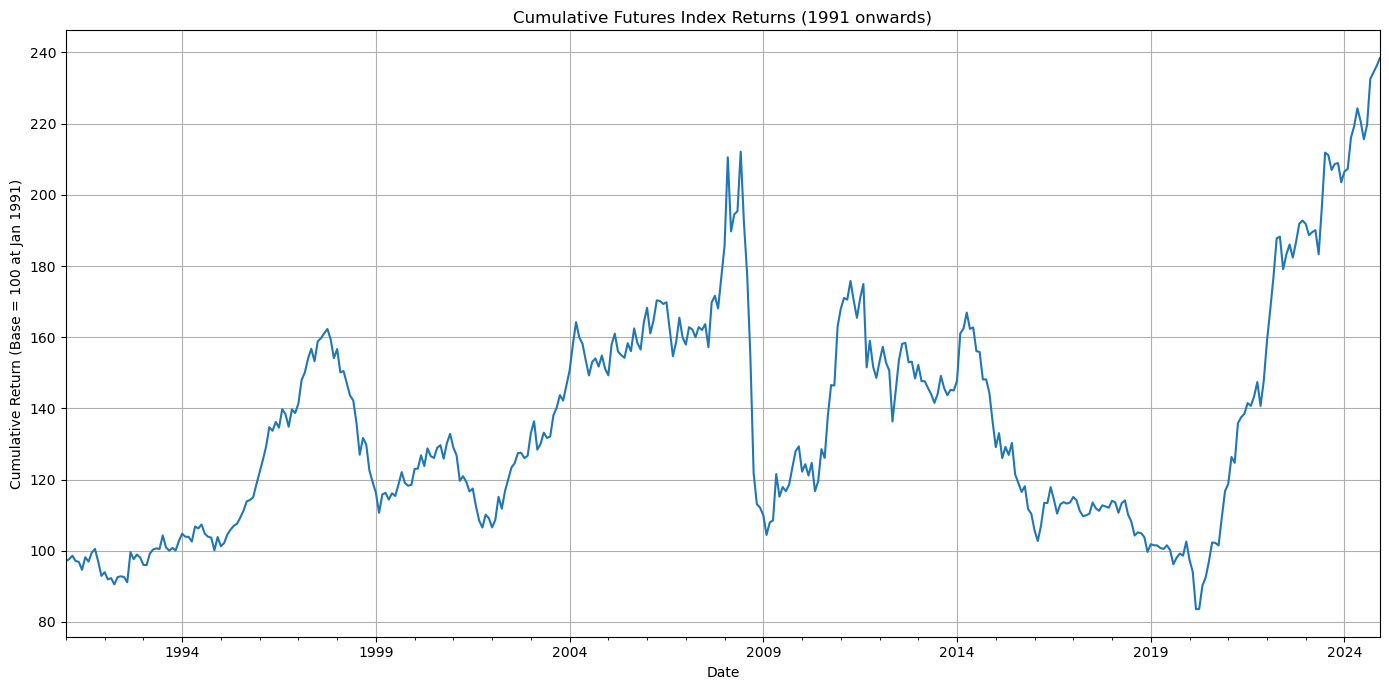

In [501]:
# plot ew_futures (not the value of the returns), but start at 100 and plot the cumulative returns
cumulative_futures_returns = (1 + ew_futures_returns).cumprod() * 100
cumulative_futures_returns.plot(figsize=(14, 7), title="Cumulative Futures Index Returns (1991 onwards)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Base = 100 at Jan 1991)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [502]:
annualized_futures_return = ew_futures_returns.mean() * 12
print(f"My Annualized Futures Index Returns: {annualized_futures_return:.2%} \
      \nAnnualized Futures Index Returns from Original Paper: 5.09%\
      \nDifference: {annualized_futures_return - 0.0509:.2%}")

My Annualized Futures Index Returns: 3.38%       
Annualized Futures Index Returns from Original Paper: 5.09%      
Difference: -1.71%


#### Yearly rebalanced index:

Instead of rebalancing monthly, we can have the index rebalance once a year.

In [503]:
def calculate_annual_rebalance_returns(monthly_returns_df):
    """
    Calculates the monthly returns of a portfolio that is rebalanced annually.

    Args:
        monthly_returns_df (pd.DataFrame): DataFrame where each column is a
                                           commodity and each row is the monthly
                                           return for a given month.

    Returns:
        pd.Series: A Series of the portfolio's monthly returns.
    """
    # Drop any rows where all values are NaN, which typically occurs in the first
    # row after a pct_change() calculation. This prevents calculation errors.
    monthly_returns_df = monthly_returns_df.dropna(how='all')

    # Use the first valid index to start the portfolio
    start_index = monthly_returns_df.first_valid_index()
    if start_index is None:
        return pd.Series(dtype=float)

    # DataFrame to track the value of each holding
    portfolio_values = pd.DataFrame(index=monthly_returns_df.index, columns=monthly_returns_df.columns)

    # Initialize weights and starting portfolio value
    initial_value = 100
    num_assets = monthly_returns_df.shape[1]
    
    # Set the initial investment for each asset at the start date
    portfolio_values.loc[start_index] = initial_value / num_assets

    # Loop through the months, starting from the second month of the data
    for i in range(1, len(monthly_returns_df)):
        current_date = monthly_returns_df.index[i]
        prev_date = monthly_returns_df.index[i-1]
        
        # Get the previous month's values
        prev_values = portfolio_values.loc[prev_date]

        # Check if it's a rebalancing month (January)
        # We don't rebalance on the very first entry
        if current_date.month == 1 and current_date != start_index:
            # Rebalance Day
            # 1. First, calculate the value of holdings at the start of the rebalance day
            #    based on the previous day's value and the current month's return.
            current_returns = monthly_returns_df.loc[current_date].fillna(0)
            holdings_before_rebalance = prev_values * (1 + current_returns)
            
            # 2. Sum the holdings to get the new total portfolio value
            total_portfolio_value = holdings_before_rebalance.sum()

            # 3. Rebalance: Divide the total value equally among all assets
            portfolio_values.loc[current_date] = total_portfolio_value / num_assets
        
        else:
            # Non-Rebalancing Day
            # The value of each holding simply grows by its own return for the month
            current_returns = monthly_returns_df.loc[current_date].fillna(0)
            portfolio_values.loc[current_date] = prev_values * (1 + current_returns)

    # Calculate the total portfolio value for each month by summing the holdings
    total_portfolio_by_month = portfolio_values.sum(axis=1)

    # Calculate the monthly return of the total portfolio
    yearly_rebalanced_returns = total_portfolio_by_month.pct_change().dropna()
    
    return yearly_rebalanced_returns


# %%
# --- Calculate returns for annually rebalanced SPOT index ---
yearly_rebal_spot_returns = calculate_annual_rebalance_returns(spot_returns_df)
print("--- Annually Rebalanced Spot Index ---")
print(yearly_rebal_spot_returns.head())
annualized_yearly_rebal_spot_return = yearly_rebal_spot_returns.mean() * 12
print(f"\nMy Annualized (Yearly Rebalanced) Spot Index Returns: {annualized_yearly_rebal_spot_return:.2%}")
print(f"For comparison, Monthly Rebalanced Spot Index was: {annualized_spot_returns:.2%}")


# %%
# --- Calculate returns for annually rebalanced FUTURES index ---
# Note: We use the collateralized returns as the input here
yearly_rebal_futures_returns = calculate_annual_rebalance_returns(collateralized_futures_returns_df)
print("\n--- Annually Rebalanced Futures Index ---")
print(yearly_rebal_futures_returns.head())
annualized_yearly_rebal_futures_return = yearly_rebal_futures_returns.mean() * 12
print(f"\nMy Annualized (Yearly Rebalanced) Futures Index Returns: {annualized_yearly_rebal_futures_return:.2%}")
# print(f"For comparison, Monthly Rebalanced Futures Index was: {annualized_futures_return:.2%}")


--- Annually Rebalanced Spot Index ---
Exchange Date
1991-02-28    0.002727
1991-03-31    0.011642
1991-04-30   -0.007441
1991-05-31    0.002119
1991-06-30   -0.032755
Freq: ME, dtype: float64

My Annualized (Yearly Rebalanced) Spot Index Returns: 6.87%
For comparison, Monthly Rebalanced Spot Index was: 7.94%

--- Annually Rebalanced Futures Index ---
Exchange Date
1991-02-28    0.005110
1991-03-31    0.008565
1991-04-30   -0.014157
1991-05-31   -0.002920
1991-06-30   -0.021278
Freq: ME, dtype: float64

My Annualized (Yearly Rebalanced) Futures Index Returns: 5.39%


/var/folders/6p/889s42gx3jj45p0zs5159byr0000gn/T/ipykernel_42329/797289003.py:65: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  yearly_rebalanced_returns = total_portfolio_by_month.pct_change().dropna()
/var/folders/6p/889s42gx3jj45p0zs5159byr0000gn/T/ipykernel_42329/797289003.py:65: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  yearly_rebalanced_returns = total_portfolio_by_month.pct_change().dropna()


### Adjusting for inflation
 Load the CPI data

In [504]:
inflation_cpi_df = pd.read_csv("data/ph-CPI-inflation.csv")
inflation_cpi_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0,,
1,1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1,,
2,1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3,,
3,1916,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6,,
4,1917,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7,,


In [505]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
inflation_cpi_long_df = inflation_cpi_df.melt(id_vars='Year', value_vars=months, var_name='Month', value_name='CPI')
inflation_cpi_long_df.head()

,Year,Month,CPI
0,1913,Jan,9.8
1,1914,Jan,10.0
2,1915,Jan,10.1
3,1916,Jan,10.4
4,1917,Jan,11.7


In [506]:
month_map = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6,
             'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
inflation_cpi_long_df['MonthNum'] = inflation_cpi_long_df['Month'].map(month_map)

inflation_cpi_long_df['Exchange Date'] = pd.to_datetime(inflation_cpi_long_df['Year'].astype(int)*10000 + inflation_cpi_long_df['MonthNum']*100 + 1, format='%Y%m%d') + pd.offsets.MonthEnd(0)

inflation_cpi_long_df = inflation_cpi_long_df.set_index('Exchange Date').sort_index()

# If you want monthly inflation rates (percentage change)
# Replace blank strings or spaces with NaN before converting to float
inflation_cpi_long_df['CPI'] = inflation_cpi_long_df['CPI'].replace(r'^\s*$', np.nan, regex=True)
cpi_series = inflation_cpi_long_df['CPI'].astype(float)
monthly_inflation_cpi_df = cpi_series.pct_change().dropna()

monthly_inflation_cpi_df.head()


/var/folders/6p/889s42gx3jj45p0zs5159byr0000gn/T/ipykernel_42329/3005503297.py:13: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  monthly_inflation_cpi_df = cpi_series.pct_change().dropna()


Exchange Date
1913-02-28    0.000000
1913-03-31    0.000000
1913-04-30    0.000000
1913-05-31   -0.010204
1913-06-30    0.010309
Name: CPI, dtype: float64

## Finding the real returns (adjust for inflation)

In [507]:
# Ensure monthly_inflation is aligned with your returns indices
aligned_inflation = monthly_inflation_cpi_df.reindex(ew_futures_returns.index).ffill()

# Calculate real (inflation-adjusted) returns
ew_real_futures_returns = ((1 + ew_futures_returns) / (1 + aligned_inflation)) - 1
ew_real_spot_returns = ((1 + ew_spot_returns) / (1 + aligned_inflation)) - 1

In [508]:
# Calculate cumulative real returns for plotting
cumulative_futures_performance = (1 + ew_real_futures_returns).cumprod() * 100
cumulative_spot_performance = (1 + ew_real_spot_returns).cumprod() * 100

print(f"Annualized Real Futures Index Returns: {ew_real_futures_returns.mean() * 12:.2%} \
        \nAnnualized Real Futures Index Returns from Original Paper: 2.93%\
        \nDifference: {ew_real_futures_returns.mean() * 12 - 0.0293:.2%}\
      \n\nAnnualized Real Spot Index Returns: {ew_real_spot_returns.mean() * 12:.2%} \
        \nAnnualized Real Spot Index Returns from Original Paper: 7.26%\
        \nDifference: {ew_real_spot_returns.mean() * 12 - 0.0726:.2%}")
      


Annualized Real Futures Index Returns: 0.83%         
Annualized Real Futures Index Returns from Original Paper: 2.93%        
Difference: -2.10%      

Annualized Real Spot Index Returns: 5.38%         
Annualized Real Spot Index Returns from Original Paper: 7.26%        
Difference: -1.88%


### Importing other data

SP500:

In [509]:
import yfinance as yf

# Download S&P 500 (^GSPC) data from Yahoo Finance
sp500_df = yf.download('^GSPC', start=start_date, end=end_date, interval='1d')
sp500_df = sp500_df[['Close']]  # Keep only the 'Close' column
sp500_df.index = pd.to_datetime(sp500_df.index)
sp500_monthly_df = sp500_df.resample('ME').last()  # Resample to get the last price of each month
# Show the first few rows
sp500_monthly_df.head()

/var/folders/6p/889s42gx3jj45p0zs5159byr0000gn/T/ipykernel_42329/805128324.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_df = yf.download('^GSPC', start=start_date, end=end_date, interval='1d')
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,^GSPC
Date,
1990-12-31,330.220001
1991-01-31,343.929993
1991-02-28,367.070007
1991-03-31,375.220001
1991-04-30,375.339996


Bonds:

In [510]:
corporate_bond_df = pd.read_csv("data/ph-ICE-BofA-US-Corporate-Index-TotalReturn.csv")
corporate_bond_df['observation_date'] = pd.to_datetime(corporate_bond_df['observation_date'])
corporate_bond_df = corporate_bond_df.set_index('observation_date')
corporate_bond_monthly_df = corporate_bond_df.resample('ME').last()
corporate_bond_monthly_df.head()


,BAMLCC0A0CMTRIV
observation_date,
1972-12-31,100.00
1973-01-31,100.00
1973-02-28,100.00
1973-03-31,100.46
1973-04-30,100.46


Adjust both for inflation

In [511]:
# adjust for inflation
corporate_bond_monthly_df['BAMLCC0A0CMTRIV'] = corporate_bond_monthly_df['BAMLCC0A0CMTRIV'].replace(r'^\s*$', np.nan, regex=True).astype(float)
corporate_bond_monthly_df['BAMLCC0A0CMTRIV'] = corporate_bond_monthly_df['BAMLCC0A0CMTRIV'].pct_change().dropna()
# Align the corporate bond returns with the futures returns index
corporate_bond_aligned = corporate_bond_monthly_df['BAMLCC0A0CMTRIV'].reindex(ew_futures_returns.index).ffill()
corporate_bond_aligned.head()


Exchange Date
1991-01-31    0.011310
1991-02-28    0.012725
1991-03-31    0.012951
1991-04-30    0.013847
1991-05-31    0.008677
Freq: ME, Name: BAMLCC0A0CMTRIV, dtype: float64

In [512]:

# adjust sp500 for inflation
sp500_monthly_df['Close'] = sp500_monthly_df['Close'].replace(r'^\s*$', np.nan, regex=True).astype(float)
sp500_monthly_df['Return'] = sp500_monthly_df['Close'].pct_change().dropna()
# Align the S&P 500 returns with the futures returns index
sp500_aligned = sp500_monthly_df['Return'].reindex(ew_futures_returns.index).ffill()
sp500_aligned.head()


Exchange Date
1991-01-31    0.041518
1991-02-28    0.067281
1991-03-31    0.022203
1991-04-30    0.000320
1991-05-31    0.038605
Freq: ME, Name: Return, dtype: float64

# Plots by paper

## 2. Erb & Harvey 2006

Unexpected inflation: there's a discepnacy between excpected and actual inflation (the means are very different). DO NOT USE

In [513]:
# inflation_series = monthly_inflation_cpi_df.copy()
# inflation_series.index = inflation_series.index.to_period('M')
# inflation_series.head()

# tbill_series = tbill_df['monthly_return'].copy()
# tbill_series.index = tbill_series.index.to_timestamp(how='end')
# tbill_series.index = tbill_series.index.to_period('M')

# # tbill_series.index = tbill_series.index.to_period('M')
# # tbill_series['Month'] = pd.to_datetime(tbill_series['Month'])
# # tbill_series.head()

# inflation_analysis_df = pd.DataFrame({
#     'Actual Inflation': inflation_series,
#     'Expected Inflation': tbill_series
# })

# # inflation_analysis_df.head()

# inflation_analysis_df['Unexpected Inflation'] = inflation_analysis_df['Actual Inflation'] - inflation_analysis_df['Expected Inflation']

# inflation_analysis_df.head()

## 3. 2015/06 Gorton & Rouwenhorst: Facts and fantasies about commodities futures 10 years later.

### Default Spread

The default spread measures the difference in yield between corporate bonds and risk-free government bonds of similar maturity. A wider spread indicates higher perceived risk in the corporate sector and a lower risk appetite among investors. The most common measure is the spread between Baa-rated corporate bonds and U.S. Treasury bonds.
What You Need to Calculate:


Default Spread at time t:

`Default Spread_t​=(Yield on Baa Corporate Bonds)_t​−(Yield on 10-Year U.S. Treasury Bonds)_t`


Data Sources:
- Baa Corporate Bonds: https://fred.stlouisfed.org/series/BAA
- 10 year US Treasury Yields: https://fred.stlouisfed.org/series/GS10



In [514]:
baa_bonds_df = pd.read_csv('data/default-spread-data/baa-corp-yields.csv')
baa_bonds_df['observation_date'] = pd.to_datetime(baa_bonds_df['observation_date'])
baa_bonds_df = baa_bonds_df.set_index('observation_date')
baa_bonds_monthly_df = baa_bonds_df.resample('ME').last()
baa_bonds_df.head()

,BAA
observation_date,
1919-01-01,7.12
1919-02-01,7.20
1919-03-01,7.15
1919-04-01,7.23
1919-05-01,7.09


In [515]:
ten_year_treasury_yields_df = pd.read_csv('data/default-spread-data/treasury-yields-10year.csv')
ten_year_treasury_yields_df['observation_date'] = pd.to_datetime(ten_year_treasury_yields_df['observation_date'])
ten_year_treasury_yields_df = ten_year_treasury_yields_df.set_index('observation_date')
ten_year_treasury_yields_monthly_df = ten_year_treasury_yields_df.resample('ME').last()
ten_year_treasury_yields_monthly_df.head()

,GS10
observation_date,
1953-04-30,2.83
1953-05-31,3.05
1953-06-30,3.11
1953-07-31,2.93
1953-08-31,2.95


In [516]:
default_spread_df = pd.DataFrame({
    'BAA Spread': baa_bonds_monthly_df['BAA'],
    '10Y Treasury Yield': ten_year_treasury_yields_monthly_df['GS10']
})
default_spread_df['Default Spread'] = default_spread_df['BAA Spread'] - default_spread_df['10Y Treasury Yield']
default_spread_df = default_spread_df.dropna()  # Drop rows with NaN
default_spread_df.head()

,BAA Spread,10Y Treasury Yield,Default Spread
observation_date,,,
1953-04-30,3.65,2.83,0.82
1953-05-31,3.78,3.05,0.73
1953-06-30,3.86,3.11,0.75
1953-07-31,3.86,2.93,0.93
1953-08-31,3.85,2.95,0.90


In [517]:
# # plot default spread
# plt.figure(figsize=(14, 7))
# plt.plot(default_spread_df.index, default_spread_df['Default Spread'], label='Default Spread (BAA - 10Y Treasury)', color='orange')
# plt.title('Default Spread Over Time')
# plt.xlabel('Date')
# plt.ylabel('Default Spread (%)')    

make default spread yearly

Text(0, 0.5, 'Default Spread (%)')

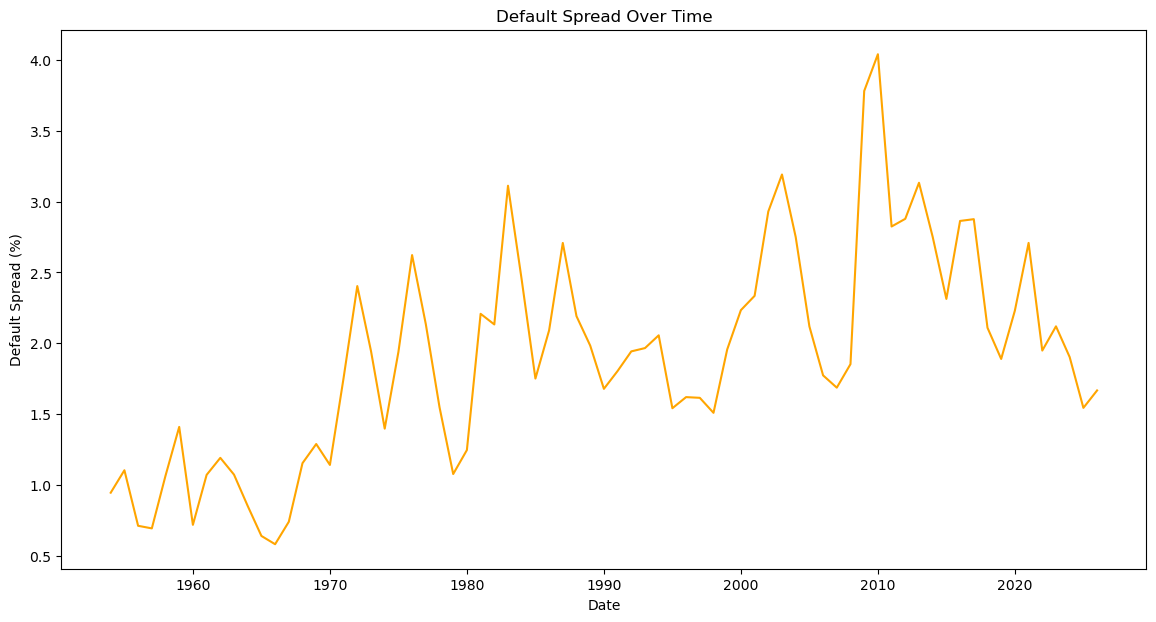

In [518]:
yearly_default_spread_series = default_spread_df['Default Spread'].resample('YE').mean()
yearly_default_spread_series
plt.figure(figsize=(14, 7))
plt.plot(yearly_default_spread_series.index, yearly_default_spread_series, label='Default Spread (BAA - 10Y Treasury)', color='orange')
plt.title('Default Spread Over Time')
plt.xlabel('Date')
plt.ylabel('Default Spread (%)')    

### Comovements:
#### 1. Over all years

Average correlation: 0.151


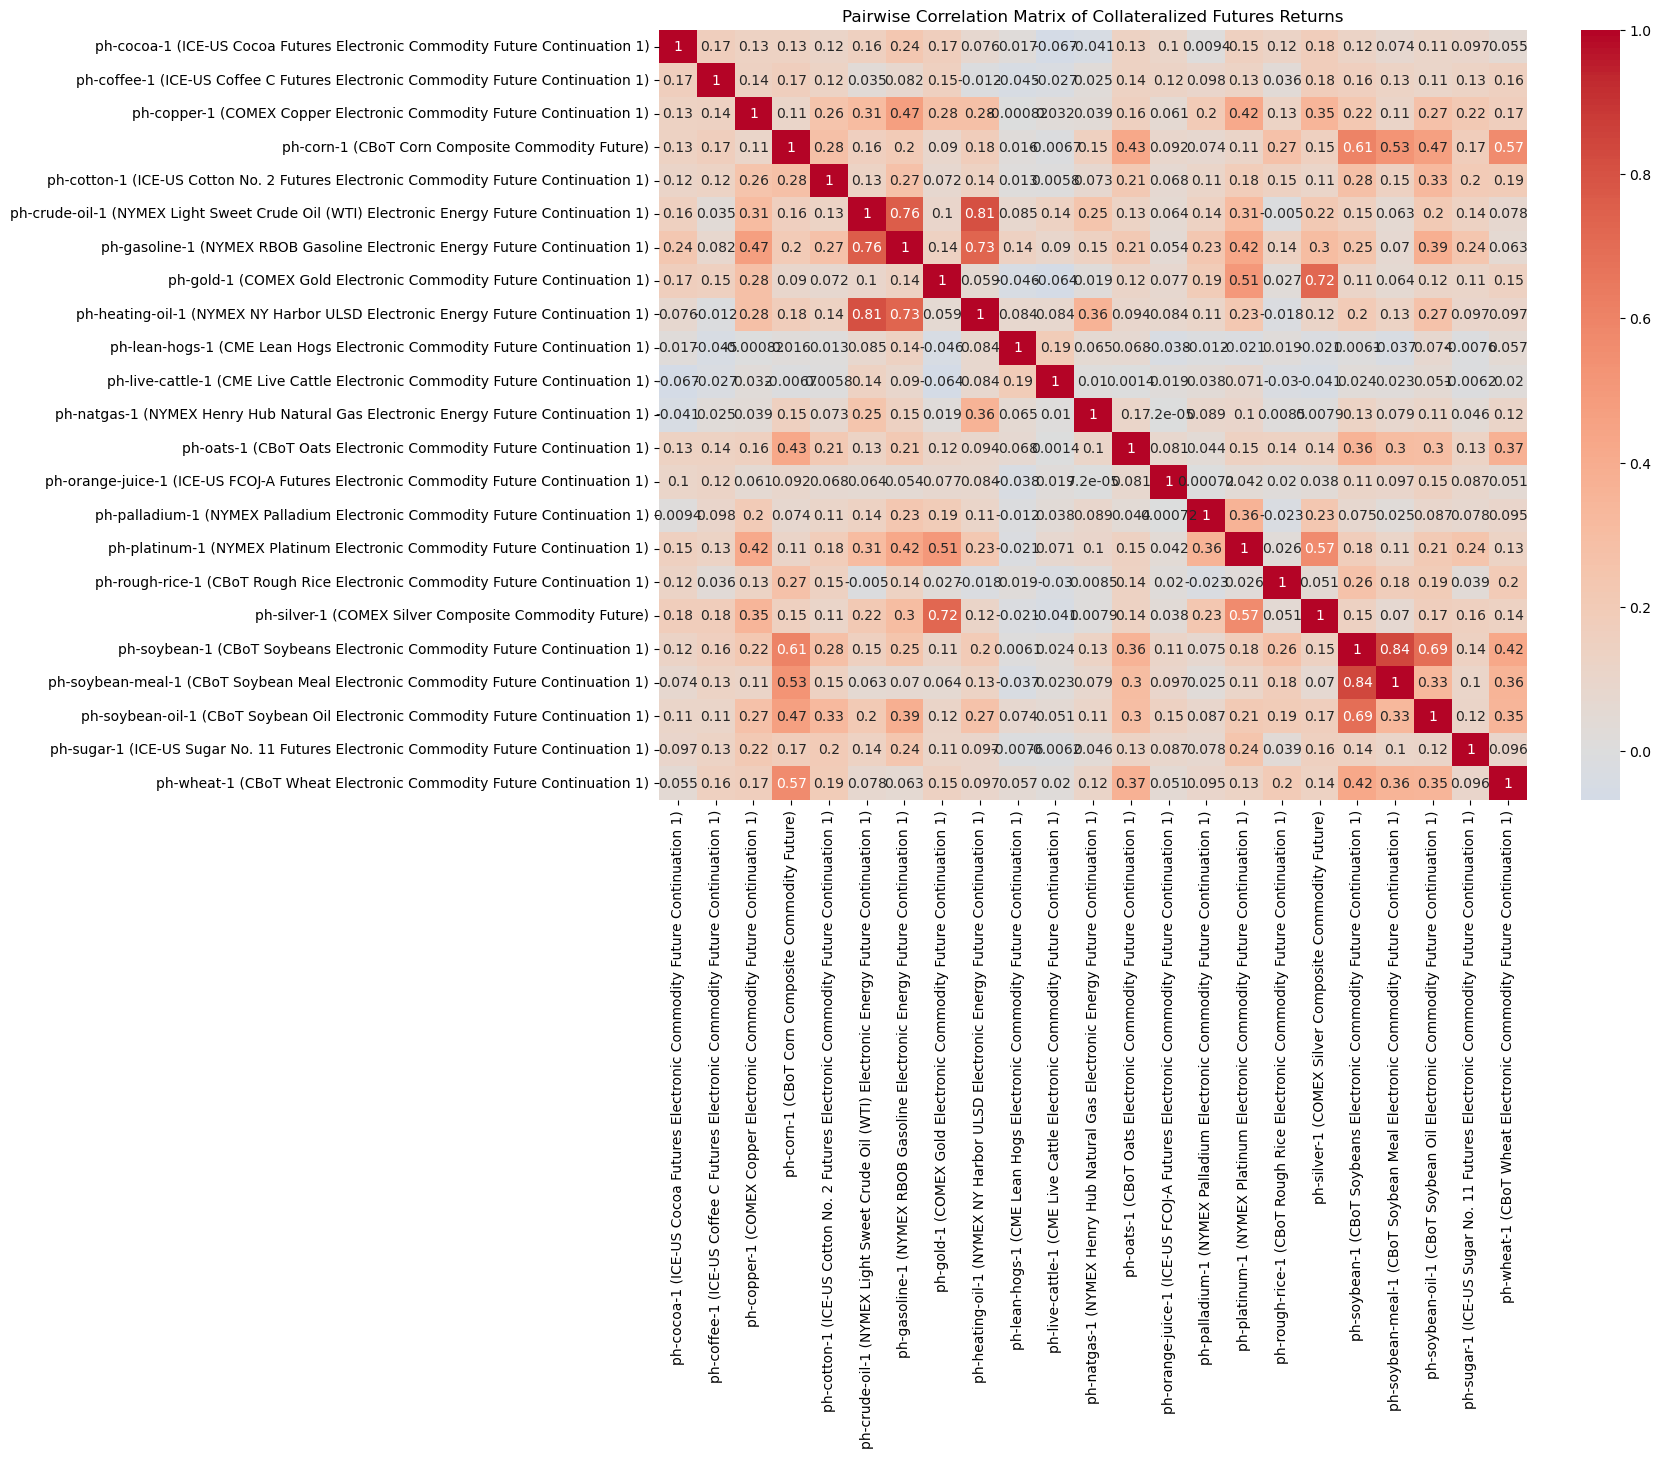

In [519]:
import seaborn as sns

# finding pairwise correlation between each of the commodities 
commodities_futures_returns_corr_matrix = collateralized_futures_returns_df.corr()
commodities_futures_returns_corr_matrix

# find the average correlation:
commodities_futures_returns_corr_matrix_copy = commodities_futures_returns_corr_matrix.copy()
np.fill_diagonal(commodities_futures_returns_corr_matrix_copy.values, np.nan)
average_corr = commodities_futures_returns_corr_matrix_copy.unstack().mean()
# Find the top and bottom quartiles of the pairwise correlations (excluding diagonal)
corr_values = commodities_futures_returns_corr_matrix_copy.unstack().dropna()
print(f"Average correlation: {average_corr:.3f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(commodities_futures_returns_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Pairwise Correlation Matrix of Collateralized Futures Returns")
plt.show()

#### 2. Timeseries (averaged over year)

In [520]:
# Create a time series of average pairwise correlations for each year
avg_corr_by_year = {}

# Group by year
for year, group in collateralized_futures_returns_df.groupby(collateralized_futures_returns_df.index.year):
    corr_matrix = group.corr()
    # Exclude diagonal (self-correlation)
    corr_values = corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)]
    avg_corr = np.nanmean(corr_values)
    avg_corr_by_year[year] = avg_corr

# Convert to pandas Series for easy plotting/analysis
avg_corr_by_year_series = pd.Series(avg_corr_by_year)
avg_corr_by_year_series.index = pd.to_datetime(avg_corr_by_year_series.index, format='%Y')
avg_corr_by_year_series.name = "Average Pairwise Correlation"

avg_corr_by_year_series.head()

1991-01-01    0.077046
1992-01-01    0.086484
1993-01-01    0.060404
1994-01-01    0.057222
1995-01-01    0.016968
Name: Average Pairwise Correlation, dtype: float64

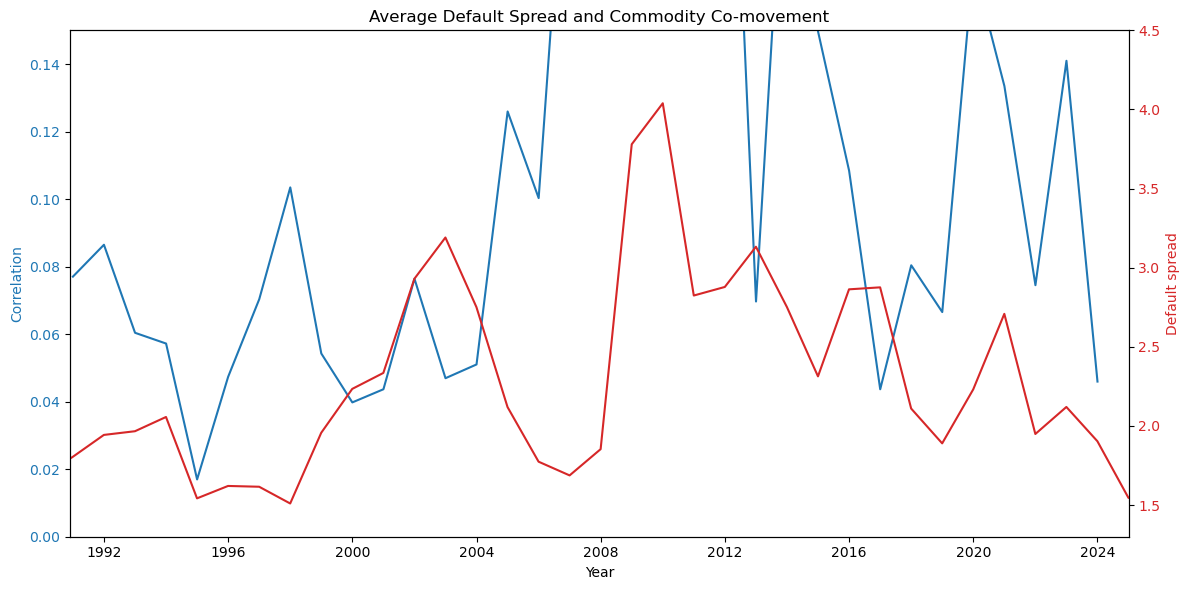

In [521]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# start_date = pd.to_datetime("2004-01-01")
# end_date = pd.to_datetime("2015-04-01")




# Primary y-axis for correlation
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Correlation', color=color)
ax1.plot(avg_corr_by_year_series.index, avg_corr_by_year_series, color=color, label='Commodity Comovement')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0, 0.15)
ax1.set_xlim(start_date, end_date)

# Secondary y-axis for default spread
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Default spread', color=color)
ax2.plot(yearly_default_spread_series.index, yearly_default_spread_series, color=color, label='Default Spread')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(1.3, 4.5)


# Title and legend
plt.title('Average Default Spread and Commodity Co-movement')
fig.tight_layout()
plt.show()

#### Fraction of commodities in backwardation (fig 4 and fig 5)

A market is in backwardation when the price of a futures contract with a nearby expiration date is higher than the price of a contract with a more distant expiration date. The term structure curve slopes downwards.

In [522]:
# daily closes for both front and second month
front_closes_df = front_closes_df.loc[start_date:end_date]
second_closes_df = second_closes_df.loc[start_date:end_date]

In [523]:
# backwardation_status_df shows true when a commodity is in backwardation, false when in contango, and NaN when data is missing for each commodity each day
backwardation_status_df = pd.DataFrame(index=front_closes_df.index)

for idx in range(len(front_closes_df.columns)):
    col_front = front_closes_df.columns[idx]
    col_second = second_closes_df.columns[idx] if idx < len(second_closes_df.columns) else None
    # Extract a short commodity name for easier display
    short_name = col_front.split('(')[0].replace('-1', '').replace('-2', '').strip()
    short_name = short_name.replace('ph-', '').replace('-', '_')
    
    if col_second is not None:
        front_series = front_closes_df[col_front]
        second_series = second_closes_df[col_second]
        # Set to NaN if either value is NaN, else compare
        status = front_series.gt(second_series) & front_series.notna() & second_series.notna()
        status = status.where(front_series.notna() & second_series.notna(), np.nan)
        backwardation_status_df[short_name] = status
    else:
        backwardation_status_df[short_name] = np.nan

In [524]:
# 1. .stack() is still correct for pooling the data into a single column.
stacked_series = backwardation_status_df.stack()

# 2. THE FIX: Instead of .resample(), we use .groupby().
# We tell it to group by the first level of the index (level=0), which is the dates,
# and to create monthly groups using pd.Grouper(freq='ME').
# Then, .mean() calculates the fraction for each month's pooled data.
backwardation_fraction = stacked_series.groupby(pd.Grouper(level=0, freq='ME')).mean()

backwardation_fraction

Exchange Date
1990-12-31    0.329356
1991-01-31    0.322314
1991-02-28    0.309927
1991-03-31    0.264108
1991-04-30    0.225207
                ...   
2003-08-31    0.378788
2003-09-30    0.340517
2003-10-31    0.302372
2003-11-30    0.306173
2003-12-31    0.261702
Freq: ME, Length: 157, dtype: object

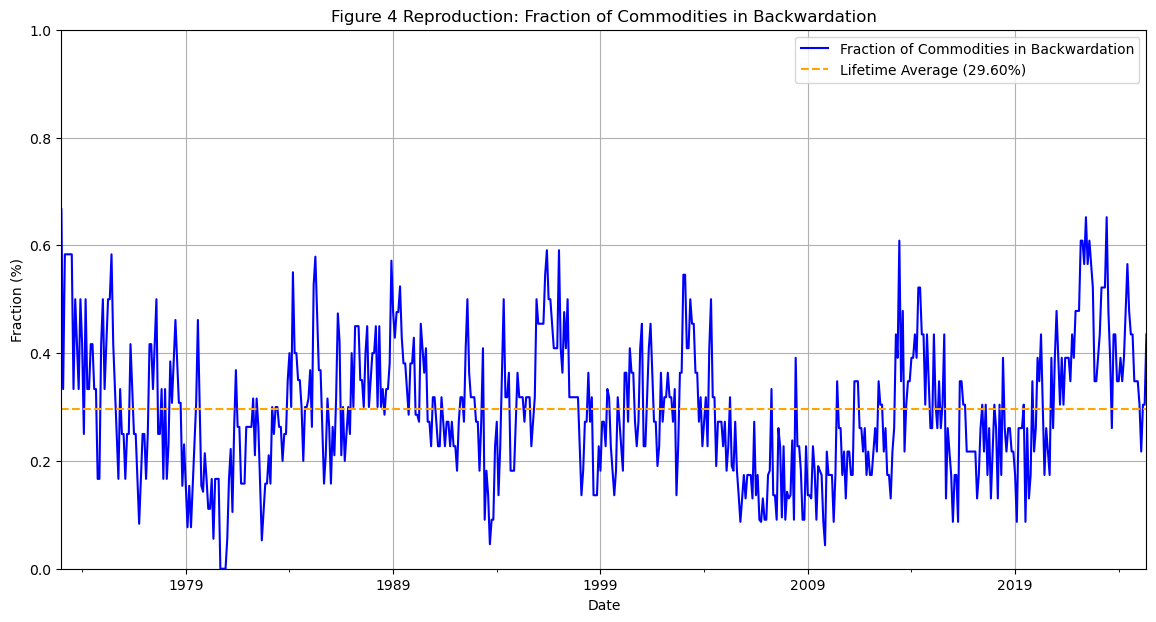

In [525]:
# --- Plot Figure 4: Fraction of Commodities in Backwardation ---
plt.figure(figsize=(14, 7))
fraction_in_backwardation.plot(label='Fraction of Commodities in Backwardation', color='blue')

# Add a horizontal line for the lifetime average
lifetime_average = fraction_in_backwardation.mean()
plt.axhline(y=lifetime_average, color='orange', linestyle='--', label=f'Lifetime Average ({lifetime_average:.2%})')

# Formatting the plot
plt.title('Figure 4 Reproduction: Fraction of Commodities in Backwardation')
plt.xlabel('Date')
plt.ylabel('Fraction (%)')
plt.ylim(0, 1)  # Y-axis from 0% to 100%
plt.legend()
plt.grid(True)

plt.show()

--- Preparing Data for Figure 5 using statsmodels ---
Successfully created a dataset with 156 overlapping monthly data points.

--- OLS Regression Results ---
                               OLS Regression Results                              
Dep. Variable:     next_month_index_return   R-squared:                       0.041
Model:                                 OLS   Adj. R-squared:                  0.035
Method:                      Least Squares   F-statistic:                     6.592
Date:                     Fri, 20 Jun 2025   Prob (F-statistic):             0.0112
Time:                             19:48:59   Log-Likelihood:                 349.29
No. Observations:                      156   AIC:                            -694.6
Df Residuals:                          154   BIC:                            -688.5
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
 

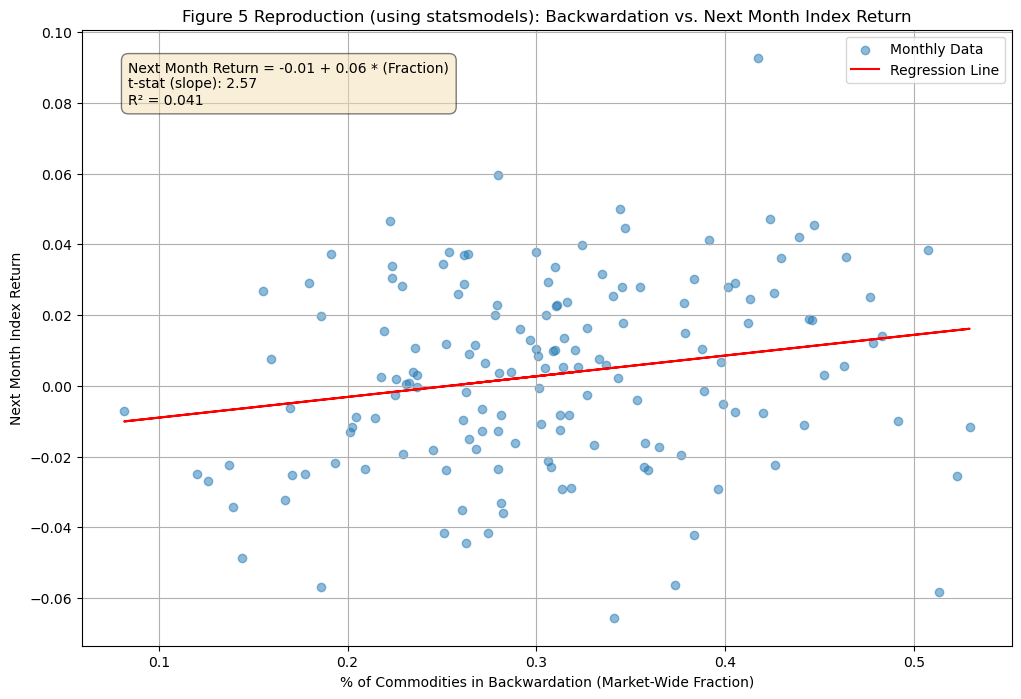

In [526]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# --- START: Complete and working code for Figure 5 ---

print("--- Preparing Data for Figure 5 using statsmodels ---")

# 1. Combine the two series into a single DataFrame.
# This is the crucial step that aligns the data by the date index.
next_month_futures_returns = ew_futures_returns.shift(-1)
fig5_data = pd.DataFrame({
    'fraction_in_backwardation': backwardation_fraction,
    'next_month_index_return': next_month_futures_returns
})

# 2. Drop any rows where either value is missing.
fig5_data.dropna(inplace=True)


# 3. **CRUCIAL FIX**: Check if we have enough data to run a regression.
# A regression requires at least two data points. This prevents all previous errors.
if len(fig5_data) < 2:
    print("\n--- ERROR ---")
    print("Cannot create Figure 5. After aligning the two data series, there are fewer than 2 overlapping data points.")
    print("This is likely due to a mismatch in the date ranges of your source data.")
    print(f"Number of data points available: {len(fig5_data)}")

else:
    print(f"Successfully created a dataset with {len(fig5_data)} overlapping monthly data points.")

    # 4. Prepare variables for statsmodels.
    # y is the dependent variable (what we're trying to predict).
    # X is the independent variable (the predictor).
    y = fig5_data['next_month_index_return']
    X = fig5_data['fraction_in_backwardation']
    
    X = pd.to_numeric(X, errors='coerce')
    y = pd.to_numeric(y, errors='coerce')
    mask = X.notna() & y.notna()
    X = X[mask]
    y = y[mask]


    # Unlike other libraries, statsmodels requires you to explicitly add a constant
    # to the independent variable to calculate the intercept (y = mx + c).
    X = sm.add_constant(X)

    # 5. Fit the Ordinary Least Squares (OLS) regression model.
    model = sm.OLS(y, X).fit()

    # 6. Print the detailed regression summary.
    # This is the main advantage of statsmodels - it provides a rich, publication-quality output.
    print("\n--- OLS Regression Results ---")
    print(model.summary())
    
    # 7. Create the plot.
    plt.figure(figsize=(12, 8))
    
    # Create the scatter plot using the original data (before adding the constant).
    plt.scatter(fig5_data['fraction_in_backwardation'], y, alpha=0.5, label='Monthly Data')
    
    # Add the regression line using the model's predicted values.
    plt.plot(fig5_data['fraction_in_backwardation'], model.predict(X), color='red', label='Regression Line')

    # Formatting and Annotations
    plt.title('Figure 5 Reproduction (using statsmodels): Backwardation vs. Next Month Index Return')
    plt.xlabel('% of Commodities in Backwardation (Market-Wide Fraction)')
    plt.ylabel('Next Month Index Return')
    plt.legend()
    plt.grid(True)
    
    # Extract statistics directly from the model for the annotation.
    intercept = model.params['const']
    slope = model.params['fraction_in_backwardation']
    r_squared = model.rsquared
    t_slope = model.tvalues['fraction_in_backwardation']
    
    annotation_text = (
        f'Next Month Return = {intercept:.2f} + {slope:.2f} * (Fraction)\n'
        f't-stat (slope): {t_slope:.2f}\n'
        f'R² = {r_squared:.3f}'
    )
    plt.annotate(annotation_text, xy=(0.05, 0.95), xycoords='axes fraction',
                 verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

    plt.show()

# --- END OF CODE BLOCK ---

#### Average correlation of Commodities with Equally Wighted Indedx by Sector

## 4. 2015 Erb & Harvey- Conquering Misperceptions about Commodity Futures Investing

In [527]:
total_return_series = ew_futures_returns.rename("Total_Return")
price_return_series = ew_spot_returns.rename("Price_Return")
inflation_series = monthly_inflation_cpi_df.rename("Inflation")


analysis_df = pd.concat([total_return_series, price_return_series, inflation_series], axis=1)
analysis_df = analysis_df.loc[start_date:end_date]




In [528]:
analysis_df['Income_Return'] = analysis_df['Total_Return'] - analysis_df['Price_Return']
analysis_df.dropna(inplace=True)
analysis_df

,Total_Return,Price_Return,Inflation,Income_Return
Exchange Date,,,,
1991-01-31,-0.028768,-0.029394,0.005979,0.000626
1991-02-28,0.005342,0.002850,0.001486,0.002491
1991-03-31,0.010043,0.012460,0.001484,-0.002416
1991-04-30,-0.014992,-0.007736,0.001481,-0.007256
1991-05-31,-0.002607,0.004283,0.002959,-0.006889
...,...,...,...,...
2024-08-31,0.018930,0.001457,0.000814,0.017473
2024-09-30,0.058783,0.048148,0.001604,0.010636
2024-10-31,0.007793,-0.002431,0.001151,0.010225


In [529]:
window = 120 # 10 years * 12 months

analysis_df['Rolling_Total'] = analysis_df['Total_Return'].rolling(window=window).mean() * 12
analysis_df['Rolling_Price'] = analysis_df['Price_Return'].rolling(window=window).mean() * 12
analysis_df['Rolling_Income'] = analysis_df['Income_Return'].rolling(window=window).mean() * 12
analysis_df['Rolling_Inflation'] = analysis_df['Inflation'].rolling(window=window).mean() * 12
analysis_df.tail()

,Total_Return,Price_Return,Inflation,Income_Return,Rolling_Total,Rolling_Price,Rolling_Income,Rolling_Inflation
Exchange Date,,,,,,,,
2024-08-31,0.018930,0.001457,0.000814,0.017473,0.041524,0.061777,-0.020253,0.028138
2024-09-30,0.058783,0.048148,0.001604,0.010636,0.052358,0.072541,-0.020183,0.028223
2024-10-31,0.007793,-0.002431,0.001151,0.010225,0.053099,0.072414,-0.019315,0.028589
2024-11-30,0.007995,0.003356,-0.000542,0.004638,0.056418,0.075035,-0.018617,0.029075
2024-12-31,0.009265,0.007177,0.000355,0.002088,0.062918,0.081431,-0.018513,0.029677


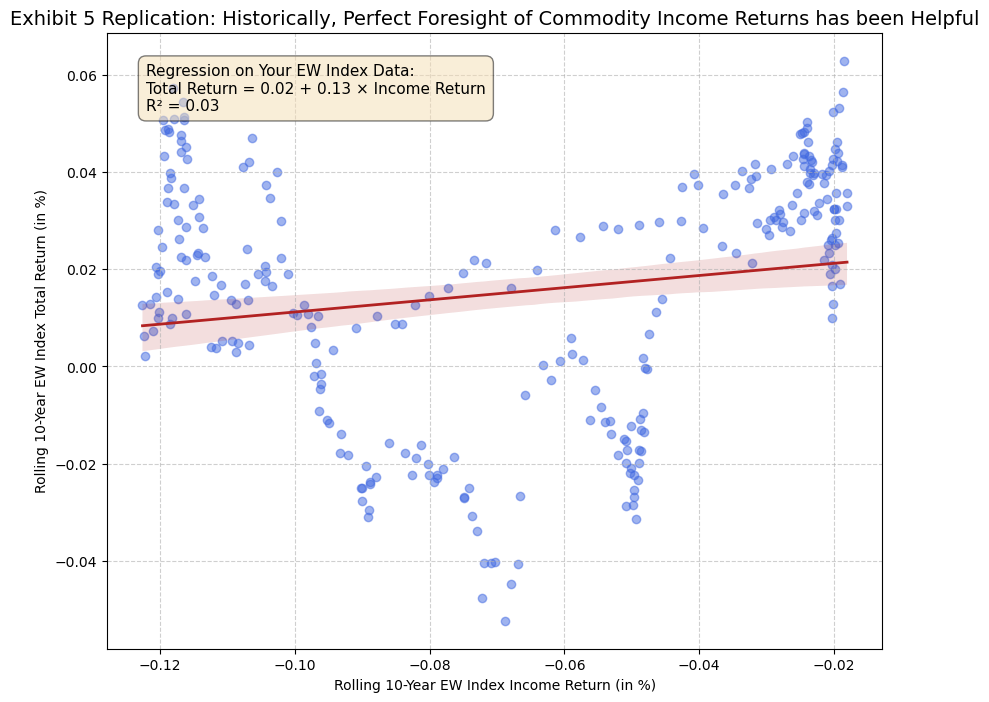

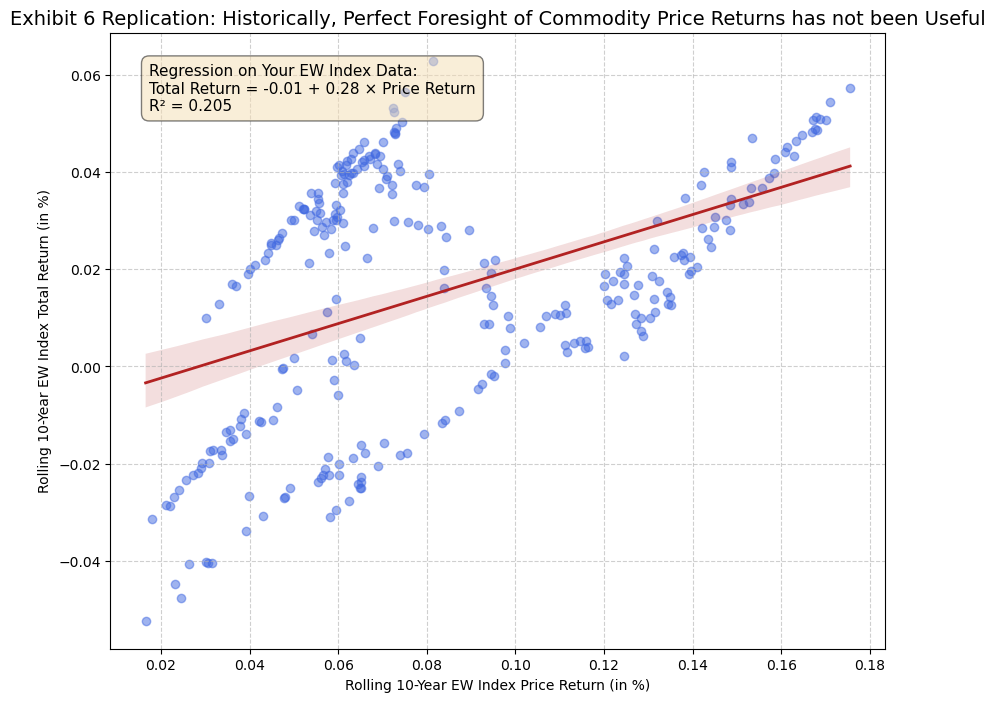

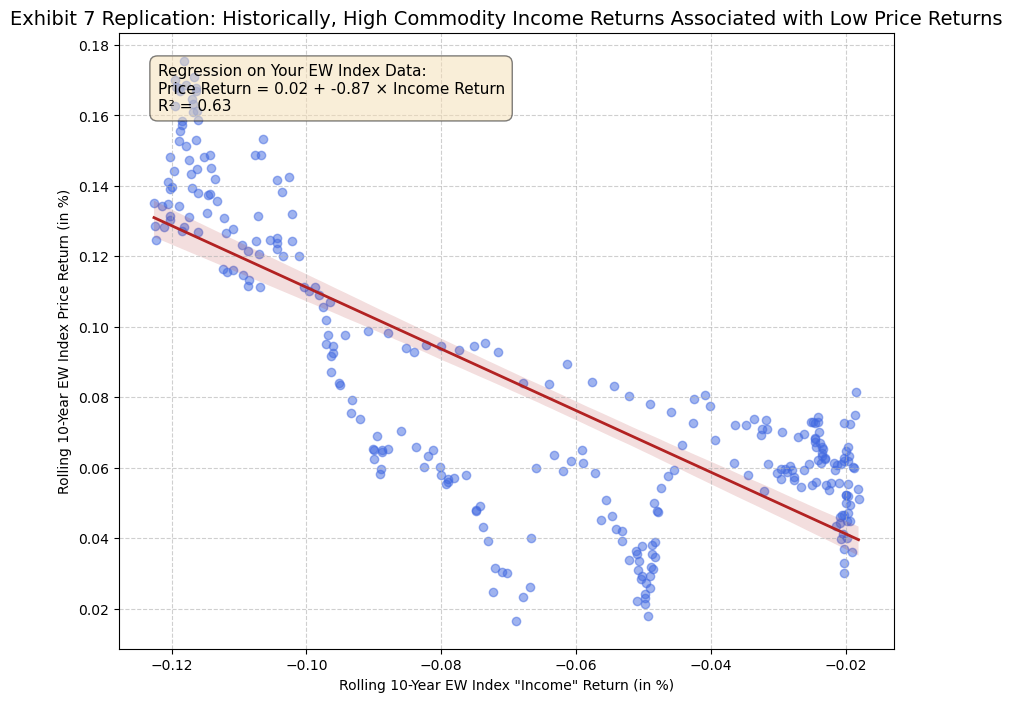

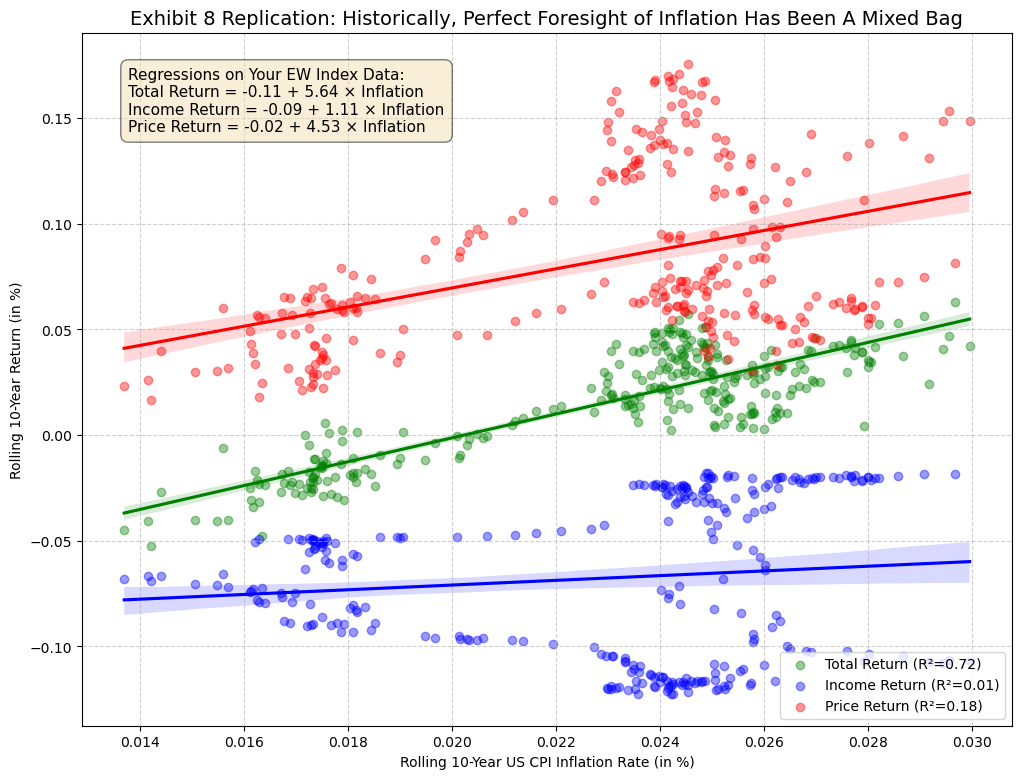

In [530]:
# Import the required library for linear regression
from scipy.stats import linregress

# Prepare the final rolling data, dropping any rows with NaNs to ensure clean regression
plotting_df = analysis_df[['Rolling_Total', 'Rolling_Price', 'Rolling_Income', 'Rolling_Inflation']].dropna()

# %% [markdown]
# ### Exhibit 5: Total Return vs. Income Return

# %%
# --- Data Preparation for Plot ---
x_data = plotting_df['Rolling_Income']
y_data = plotting_df['Rolling_Total']

# --- Perform Linear Regression ---
# linregress returns: slope, intercept, r_value, p_value, stderr
slope, intercept, r_value, _, _ = linregress(x_data, y_data)
r_squared = r_value**2

# --- Create the Plot ---
plt.figure(figsize=(10, 8))
ax = sns.regplot(x=x_data, y=y_data,
                 scatter_kws={'alpha': 0.5, 'color': 'royalblue'},
                 line_kws={'color': 'firebrick', 'linewidth': 2})

# --- Set Titles and Labels from Paper Description ---
plt.title('Exhibit 5 Replication: Historically, Perfect Foresight of Commodity Income Returns has been Helpful', fontsize=14)
ax.set_xlabel('Rolling 10-Year EW Index Income Return (in %)')
ax.set_ylabel('Rolling 10-Year EW Index Total Return (in %)')

# --- Add Annotation with Calculated Statistics ---
annotation_text = (
    f"Regression on Your EW Index Data:\n"
    f"Total Return = {intercept:.2f} + {slope:.2f} × Income Return\n"
    f"R² = {r_squared:.2f}"
)
ax.text(0.05, 0.95, annotation_text, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# %% [markdown]
# ### Exhibit 6: Total Return vs. Price Return

# %%
# --- Data Preparation ---
x_data = plotting_df['Rolling_Price']
y_data = plotting_df['Rolling_Total']

# --- Perform Linear Regression ---
slope, intercept, r_value, _, _ = linregress(x_data, y_data)
r_squared = r_value**2

# --- Create the Plot ---
plt.figure(figsize=(10, 8))
ax = sns.regplot(x=x_data, y=y_data,
                 scatter_kws={'alpha': 0.5, 'color': 'royalblue'},
                 line_kws={'color': 'firebrick', 'linewidth': 2})

# --- Set Titles and Labels ---
plt.title('Exhibit 6 Replication: Historically, Perfect Foresight of Commodity Price Returns has not been Useful', fontsize=14)
ax.set_xlabel('Rolling 10-Year EW Index Price Return (in %)')
ax.set_ylabel('Rolling 10-Year EW Index Total Return (in %)')

# --- Add Annotation ---
annotation_text = (
    f"Regression on Your EW Index Data:\n"
    f"Total Return = {intercept:.2f} + {slope:.2f} × Price Return\n"
    f"R² = {r_squared:.3f}" # Using 3 decimal places to match paper's 0.004
)
ax.text(0.05, 0.95, annotation_text, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# %% [markdown]
# ### Exhibit 7: Price Return vs. Income Return

# %%
# --- Data Preparation ---
x_data = plotting_df['Rolling_Income']
y_data = plotting_df['Rolling_Price']

# --- Perform Linear Regression ---
slope, intercept, r_value, _, _ = linregress(x_data, y_data)
r_squared = r_value**2

# --- Create the Plot ---
plt.figure(figsize=(10, 8))
ax = sns.regplot(x=x_data, y=y_data,
                 scatter_kws={'alpha': 0.5, 'color': 'royalblue'},
                 line_kws={'color': 'firebrick', 'linewidth': 2})

# --- Set Titles and Labels ---
plt.title('Exhibit 7 Replication: Historically, High Commodity Income Returns Associated with Low Price Returns', fontsize=14)
ax.set_xlabel('Rolling 10-Year EW Index "Income" Return (in %)')
ax.set_ylabel('Rolling 10-Year EW Index Price Return (in %)')

# --- Add Annotation ---
annotation_text = (
    f"Regression on Your EW Index Data:\n"
    f"Price Return = {intercept:.2f} + {slope:.2f} × Income Return\n"
    f"R² = {r_squared:.2f}"
)
ax.text(0.05, 0.95, annotation_text, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# %% [markdown]
# ### Exhibit 8: The Inflation Hedge Analysis

# %%
plt.figure(figsize=(12, 9))
ax = plt.gca() # Get current axes

# --- 1. Total Return vs. Inflation ---
x_total = plotting_df['Rolling_Inflation']
y_total = plotting_df['Rolling_Total']
slope_total, intercept_total, r_total, _, _ = linregress(x_total, y_total)
r2_total = r_total**2
sns.regplot(x=x_total, y=y_total, ax=ax, color='green', scatter_kws={'alpha':0.4}, label=f'Total Return (R²={r2_total:.2f})')

# --- 2. Income Return vs. Inflation ---
x_income = plotting_df['Rolling_Inflation']
y_income = plotting_df['Rolling_Income']
slope_income, intercept_income, r_income, _, _ = linregress(x_income, y_income)
r2_income = r_income**2
sns.regplot(x=x_income, y=y_income, ax=ax, color='blue', scatter_kws={'alpha':0.4}, label=f'Income Return (R²={r2_income:.2f})')

# --- 3. Price Return vs. Inflation ---
x_price = plotting_df['Rolling_Inflation']
y_price = plotting_df['Rolling_Price']
slope_price, intercept_price, r_price, _, _ = linregress(x_price, y_price)
r2_price = r_price**2
sns.regplot(x=x_price, y=y_price, ax=ax, color='red', scatter_kws={'alpha':0.4}, label=f'Price Return (R²={r2_price:.2f})')

# --- Set Titles and Labels ---
plt.title('Exhibit 8 Replication: Historically, Perfect Foresight of Inflation Has Been A Mixed Bag', fontsize=14)
ax.set_xlabel('Rolling 10-Year US CPI Inflation Rate (in %)')
ax.set_ylabel('Rolling 10-Year Return (in %)')

# --- Add Annotation Block ---
annotation_text = (
    f"Regressions on Your EW Index Data:\n"
    f"Total Return = {intercept_total:.2f} + {slope_total:.2f} × Inflation\n"
    f"Income Return = {intercept_income:.2f} + {slope_income:.2f} × Inflation\n"
    f"Price Return = {intercept_price:.2f} + {slope_price:.2f} × Inflation"
)
ax.text(0.05, 0.95, annotation_text, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Export the data

In [531]:
# --- 1. Setup Export Directory ---
export_dir = 'streamlit_data'
os.makedirs(export_dir, exist_ok=True)
print(f"Data will be exported to the '{export_dir}/' directory.")


Data will be exported to the 'streamlit_data/' directory.


In [532]:
# --- 3. Export Daily Price Histories (Requirement d) ---
# These files contain the raw, daily prices for the selected date range.
# The MultiIndex columns will be preserved in the CSV.
daily_front_month_filepath = os.path.join(export_dir, 'daily_front_month_prices.csv')
filtered_front_month_df.to_csv(daily_front_month_filepath)
print(f"  - Saved daily front-month prices to: {daily_front_month_filepath}")

daily_second_month_filepath = os.path.join(export_dir, 'daily_second_month_prices.csv')
filtered_second_month_df.to_csv(daily_second_month_filepath)
print(f"  - Saved daily second-month prices to: {daily_second_month_filepath}")


  - Saved daily front-month prices to: streamlit_data/daily_front_month_prices.csv
  - Saved daily second-month prices to: streamlit_data/daily_second_month_prices.csv


In [533]:
# --- 4. Consolidate and Export Monthly Returns (Requirements a, b, c) ---
# This single file will contain all the monthly returns needed to create the
# historical performance plots for all indices (commodities, equities, bonds).

# Combine all final monthly return Series into one DataFrame
all_returns_df = pd.concat([
    ew_spot_returns.rename("Spot_Index_Returns"),
    ew_futures_returns.rename("Futures_Index_Returns"),
    ew_real_spot_returns.rename("Real_Spot_Index_Returns"),
    ew_real_futures_returns.rename("Real_Futures_Index_Returns"),
    sp500_aligned.rename("SP500_Returns"),
    corporate_bond_aligned.rename("Bond_Index_Returns"),
    monthly_inflation_cpi_df.rename("Inflation_Rate")
], axis=1)

# Ensure the index is a standard DatetimeIndex for compatibility
# (No conversion needed if already DatetimeIndex)

# Save the combined returns data
returns_filepath = os.path.join(export_dir, 'monthly_returns_all_indices.csv')
# Restrict to data from 2004-01-01 onwards
all_returns_df = all_returns_df.loc["2004-01-01":"2025-04-01"]
all_returns_df.to_csv(returns_filepath)
print(f"  - Saved all consolidated monthly returns to: {returns_filepath}")

print("\nExport complete.")

  - Saved all consolidated monthly returns to: streamlit_data/monthly_returns_all_indices.csv

Export complete.


# Reproducing Results

Paper 1 - 

Paper 2 - FACTS AND FANTASIES ABOUT COMMODITY FUTURES TEN YEARS LATER